# Q1 [50%]. The company has commissioned you to develop a predictive model to enhance its
recommender systems by focusing on popular songs. The primary goal of this project is to predict
whether a song’s popularity score exceeds 64 (>=65), enabling Spotify to prioritize songs that are
more likely to engage users effectively.
To achieve this goal, you are required to develop and compare three different models to predict
song popularity. The purpose of building multiple models is to identify and select the most suitable
one based on its evaluation metrics. Once the models are developed and evaluated, you must justify
your choice of the best model by explaining why it is the most suitable for predicting song
popularity.
The project consists of the two phases to be completed:
1. Sample selection and data preprocessing [10%]:
a. Download “songs_utf.csv.”
b. Apply an appropriate strategy for handling missing values. (e.g., removing all
records with missing values)
c. Select a set of attributes relevant for predicting popularity. Encode categorical
attributes if necessary.
d. Create the outcome variable: Set it as 1 if the popularity score is greater than 64
(>=65), and 0 otherwise.
2. Predictions [30%]:
a. Develop and compare three different approaches with the goal of predicting
whether a song’s popularity score will exceed 64 (>=65). If necessary, provide an
appropriate fine-tuning strategy using 10-fold cross-validation. Report appropriate
evaluation metrics
b. Choose the best model based on accuracy. (You can choose the models using either
holdout accuracy or cross-validation accuracy)
3. Notes on Documentation:
a. You are free to explore and select features that provide the best prediction results
and fine-tune the models as necessary. Ensure you justify your feature selection and
fine-tuning processes clearly.
b. Based on your results, provide appropriate managerial insights that can help guide
decision-making. These insights should include, but are not limited to, suggestions
and recommendations for future songs Spotify should consider including. Focus on
attributes that are associated with higher engagement and popularity scores. By
leveraging these insights, Spotify can optimize playlists and promote songs that are
more likely to engage users and increase satisfaction.

## Initial Data Pre-Processing and EDA


In [ ]:
# import libraries

# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

# For Google Colab integration
import os
from google.colab import drive



from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import data as dataframe
file_path = '/content/drive/MyDrive/INFO 648/Data/songs_utf.csv'
df = pd.read_csv(file_path)

# calling head() method
df.head()

artist                    song  song_name_len  duration_ms  \
0  Britney Spears  Oops!...I Did It Again           22.0     211160.0   
1       blink-182    All The Small Things           20.0     167066.0   
2      Faith Hill                 Breathe            7.0     250546.0   
3        Bon Jovi            It's My Life           12.0     224493.0   
4          *NSYNC             Bye Bye Bye           11.0     200560.0   

  explicit    year  popularity  hot  danceability  energy  ...  valence  \
0    False  2000.0        77.0  1.0         0.751   0.834  ...    0.894   
1    False  1999.0        79.0  1.0         0.434   0.897  ...    0.684   
2    False  1999.0        66.0  0.0         0.529   0.496  ...    0.278   
3    False  2000.0        78.0  1.0         0.551   0.913  ...    0.544   
4    False  2000.0        65.0  0.0         0.614   0.928  ...    0.879   

     tempo         genre  pop  rock  hiphop  dance  folk  rnb latin  
0   95.053           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
1  148.726     rock, pop  1.0   1.0     0.0    0.0   0.0  0.0   0.0  
2  136.859  pop, country  1.0   0.0     0.0    0.0   0.0  0.0   0.0  
3  119.992   rock, metal  0.0   1.0     0.0    0.0   0.0  0.0   0.0  
4  172.656           pop  1.0   0.0     0.0    0.0   0.0  0.0   0.0  

[5 rows x 27 columns]

In [ ]:
df_summary = df.describe()
df_summary

song_name_len    duration_ms         year   popularity          hot  \
count    1500.000000    1500.000000  1500.000000  1500.000000  1500.000000   
mean       17.552667  234667.923333  2007.034000    59.414000     0.128000   
std        11.541289   38723.131986     4.567722    19.346045     0.334201   
min         2.000000  127920.000000  1998.000000     0.000000     0.000000   
25%         9.000000  209116.500000  2003.000000    56.000000     0.000000   
50%        14.000000  228973.000000  2007.000000    64.000000     0.000000   
75%        23.000000  254086.000000  2011.000000    71.000000     0.000000   
max        75.000000  484146.000000  2020.000000    89.000000     1.000000   

       danceability       energy          key     loudness         mode  ...  \
count   1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  ...   
mean       0.659393     0.737019     5.365333    -5.434571     0.562000  ...   
std        0.142157     0.151874     3.587447     1.915075     0.496307  ...   
min        0.129000     0.054900     0.000000   -20.514000     0.000000  ...   
25%        0.568000     0.645750     2.000000    -6.452500     0.000000  ...   
50%        0.670000     0.754000     6.000000    -5.179000     1.000000  ...   
75%        0.758000     0.857250     8.000000    -4.142500     1.000000  ...   
max        0.975000     0.999000    11.000000    -0.276000     1.000000  ...   

          liveness      valence        tempo          pop         rock  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.187266     0.573458   119.884948     0.823333     0.134000   
std       0.146814     0.221088    26.762101     0.381514     0.340766   
min       0.023400     0.038100    60.019000     0.000000     0.000000   
25%       0.086200     0.411000    98.551250     1.000000     0.000000   
50%       0.129000     0.584000   120.092500     1.000000     0.000000   
75%       0.256000     0.755250   133.126250     1.000000     0.000000   
max       0.853000     0.973000   210.851000     1.000000     1.000000   

            hiphop        dance         folk          rnb        latin  
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  
mean      0.385333     0.158000     0.010667     0.264667     0.025333  
std       0.486836     0.364863     0.102762     0.441303     0.157188  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [ ]:
df.columns

Index(['artist', 'song', 'song_name_len', 'duration_ms', 'explicit', 'year',
       'popularity', 'hot', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genre', 'pop', 'rock', 'hiphop', 'dance', 'folk',
       'rnb', 'latin'],
      dtype='object')

In [ ]:
display(df.isna().sum()) ##check missing value

artist              499
song                499
song_name_len       499
duration_ms         499
explicit            499
year                499
popularity          499
hot                 499
danceability        499
energy              499
key                 499
loudness            499
mode                499
speechiness         499
acousticness        499
instrumentalness    499
liveness            499
valence             499
tempo               499
genre               499
pop                 499
rock                499
hiphop              499
dance               499
folk                499
rnb                 499
latin               499
dtype: int64

In [ ]:
df = df.dropna() ##drop missing value

In [ ]:
display(df.isna().sum()) ##recheck missing value again

artist              0
song                0
song_name_len       0
duration_ms         0
explicit            0
year                0
popularity          0
hot                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

#### check how many categorical/numeric variables we have

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object" and col not in 'popularity'] ##exclude our target variable: popularity
numeric_variables

['song_name_len',
 'duration_ms',
 'year',
 'hot',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

In [ ]:
categorical_variables = [col for col in df.columns if df[col].dtype == "O" and col != 'popularity']  ###exclude our target: Popularity
categorical_variables

['artist', 'song', 'explicit', 'genre']

In [ ]:
df[['artist', 'song', 'explicit', 'genre']]

artist                             song explicit  \
0     Britney Spears           Oops!...I Did It Again    False   
1          blink-182             All The Small Things    False   
2         Faith Hill                          Breathe    False   
3           Bon Jovi                     It's My Life    False   
4             *NSYNC                      Bye Bye Bye    False   
...              ...                              ...      ...   
1495       Olly Murs  Wrapped Up (feat. Travie McCoy)    False   
1496       Sam Smith                 Money On My Mind    False   
1497    Jason Derulo                         Trumpets    False   
1498     Nicki Minaj                      Bed Of Lies     True   
1499      Nick Jonas                  Jealous - Remix     True   

                      genre  
0                       pop  
1                 rock, pop  
2              pop, country  
3               rock, metal  
4                       pop  
...                     ...  
1495  pop, Dance/Electronic  
1496                    pop  
1497           hip hop, pop  
1498           hip hop, pop  
1499                    pop  

[1500 rows x 4 columns]

####Select the variables we are interested in

In [ ]:
df_sub = df[['song_name_len', 'duration_ms', 'explicit',
             'popularity', 'danceability', 'energy', 'loudness',
             'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk',
             'rnb', 'latin']]

In [ ]:
display(df_sub.isna().sum()) ##recheck missing value again

song_name_len       0
duration_ms         0
explicit            0
popularity          0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
pop                 0
rock                0
hiphop              0
dance               0
folk                0
rnb                 0
latin               0
dtype: int64

In [ ]:
# Numeric Variables
numeric_variables = [col for col in df_sub.columns if df_sub[col].dtype != "object" and col not in "popularity"] ##exclude our target variable: popularity
numeric_variables

['song_name_len',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'rock',
 'hiphop',
 'dance',
 'folk',
 'rnb',
 'latin']

In [ ]:
categorical_variables = [col for col in df_sub.columns if df_sub[col].dtype == "O" and col != "popularity"]  ###exclude our target: "popularity"
categorical_variables

['explicit']

In [ ]:
df_sub['explicit']

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498     True
1499     True
Name: explicit, Length: 1500, dtype: object

#### Encode our categorical data

In [ ]:
##encode categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_sub['explicit'] = label_encoder.fit_transform(df_sub['explicit'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


#Print out what we encoded for gender
print("Explicit Encoding:")
print(mapping)

Explicit Encoding:
{False: np.int64(0), True: np.int64(1)}


<ipython-input-17-d22a3bd68037>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['explicit'] = label_encoder.fit_transform(df_sub['explicit'])


####Now lets check our target variable

In [ ]:
display(df_sub['popularity'].value_counts())
##Our target variable is a categorical variable

popularity
0.0     75
68.0    62
61.0    57
57.0    55
65.0    55
        ..
17.0     1
18.0     1
6.0      1
88.0     1
89.0     1
Name: count, Length: 74, dtype: int64

In [ ]:
df_sub['popularity']

0       77.0
1       79.0
2       66.0
3       78.0
4       65.0
        ... 
1495     0.0
1496    62.0
1497    53.0
1498    53.0
1499     0.0
Name: popularity, Length: 1500, dtype: float64

In [ ]:
#### Create a new column for popularity label
df_sub['popularity_label'] = df_sub['popularity'].apply(lambda x: 'Popular' if x >= 65 else 'Not Popular')

#### Encode the target variable
target_label_encoder = LabelEncoder()
df_sub['popularity_label'] = target_label_encoder.fit_transform(df_sub['popularity_label'])

## Display the stats after encoding
display(df_sub['popularity_label'].value_counts())

## Show mapping (e.g., {'Not Popular': 0, 'Popular': 1})
mapping = dict(zip(target_label_encoder.classes_, target_label_encoder.transform(target_label_encoder.classes_)))
print(mapping)

<ipython-input-20-5a08589fa3dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['popularity_label'] = df_sub['popularity'].apply(lambda x: 'Popular' if x >= 65 else 'Not Popular')
<ipython-input-20-5a08589fa3dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['popularity_label'] = target_label_encoder.fit_transform(df_sub['popularity_label'])


popularity_label
0    786
1    714
Name: count, dtype: int64

{'Not Popular': np.int64(0), 'Popular': np.int64(1)}


In [ ]:
# Drop the continuous target after encoding
df_sub.drop(columns=['popularity'], inplace=True)

<ipython-input-21-38e15dfc50c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop(columns=['popularity'], inplace=True)


####Let see how each feature is related to our target variable

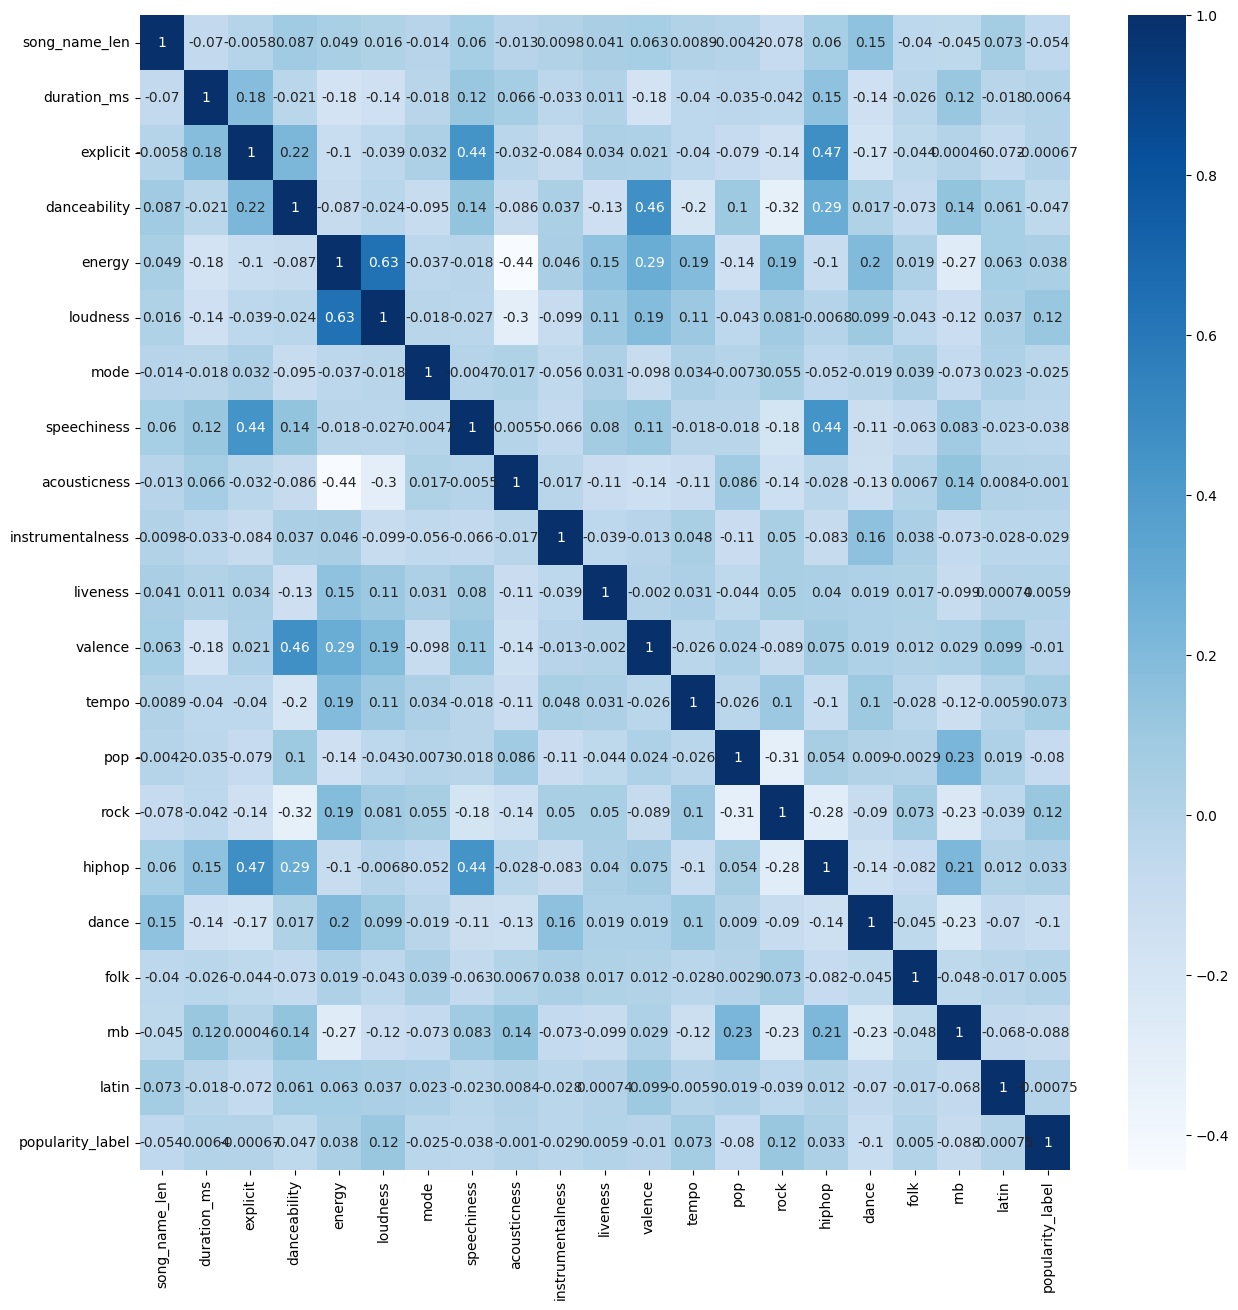

In [ ]:
corr_matrix = df_sub.corr()
plt.figure(figsize=(15,15)) ###change the figure size here
sns.heatmap(corr_matrix, cmap='Blues', annot=True)
plt.show()

## Q1.1 Decision Tree

#### Define features (X) and target (y), then split the data into training/testing sets


In [ ]:
X = df_sub.drop('popularity_label', axis=1)  # Drop the target column to get independent variables
y = df_sub['popularity_label']  # Select the target column directly as our y


# Split the dataset into training and testing sets test_size using 0.3: 70% training and 30% testing
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train

song_name_len  duration_ms  explicit  danceability  energy  loudness  \
1017           22.0     192446.0         0         0.451   0.948    -0.740   
188            11.0     291781.0         1         0.850   0.700    -6.490   
189            10.0     254400.0         1         0.933   0.561    -5.961   
1422            5.0     231906.0         0         0.670   0.476    -6.253   
1227           20.0     233478.0         0         0.726   0.698    -4.165   
...             ...          ...       ...           ...     ...       ...   
715            14.0     247946.0         1         0.630   0.782    -5.440   
905            10.0     236266.0         0         0.617   0.741    -3.970   
1096           15.0     226000.0         0         0.443   0.683    -5.521   
235            34.0     237800.0         1         0.660   0.536    -8.786   
1061           10.0     199026.0         0         0.762   0.748    -4.150   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
1017   1.0       0.1470        0.2550          0.000000    0.3920    0.295   
188    1.0       0.0478        0.0616          0.000002    0.2440    0.722   
189    1.0       0.1220        0.0275          0.000000    0.1020    0.586   
1422   0.0       0.0406        0.3280          0.000000    0.1040    0.235   
1227   1.0       0.0431        0.0490          0.000000    0.3090    0.867   
...    ...          ...           ...               ...       ...      ...   
715    0.0       0.1320        0.0828          0.000000    0.0340    0.418   
905    1.0       0.0311        0.1310          0.000000    0.0772    0.306   
1096   1.0       0.0343        0.0198          0.000005    0.3130    0.447   
235    0.0       0.2900        0.2330          0.006690    0.1110    0.775   
1061   0.0       0.0330        0.0266          0.000000    0.3480    0.851   

        tempo  pop  rock  hiphop  dance  folk  rnb  latin  
1017  176.985  1.0   0.0     0.0    1.0   0.0  0.0    0.0  
188   101.875  1.0   0.0     1.0    0.0   0.0  1.0    0.0  
189   139.976  1.0   0.0     1.0    0.0   0.0  0.0    0.0  
1422   96.975  1.0   0.0     1.0    0.0   0.0  1.0    0.0  
1227  143.994  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
...       ...  ...   ...     ...    ...   ...  ...    ...  
715   140.144  1.0   0.0     1.0    0.0   0.0  0.0    0.0  
905   118.984  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
1096   81.986  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
235   159.963  1.0   0.0     1.0    0.0   0.0  1.0    0.0  
1061  110.009  1.0   0.0     1.0    0.0   0.0  0.0    0.0  

[1050 rows x 20 columns]

In [ ]:
X_test

song_name_len  duration_ms  explicit  danceability  energy  loudness  \
91             17.0     230093.0         0         0.575   0.786    -4.353   
75             16.0     230200.0         0         0.771   0.685    -4.639   
1264           27.0     228026.0         0         0.603   0.831    -3.443   
330            17.0     231920.0         0         0.741   0.469    -7.627   
1349            3.0     247906.0         0         0.674   0.628    -7.079   
...             ...          ...       ...           ...     ...       ...   
581            14.0     219493.0         0         0.587   0.583    -5.284   
154            26.0     210813.0         0         0.888   0.800    -3.944   
643             5.0     273973.0         0         0.906   0.633    -5.316   
930            11.0     294573.0         1         0.696   0.921    -3.755   
1466            9.0     169866.0         0         0.659   0.911    -2.280   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
91     1.0       0.0296      0.252000          0.000000    0.1590    0.518   
75     1.0       0.0567      0.005430          0.001570    0.0537    0.683   
1264   0.0       0.0479      0.027000          0.000000    0.6520    0.358   
330    0.0       0.0805      0.006010          0.447000    0.3060    0.313   
1349   1.0       0.0300      0.001440          0.000000    0.0944    0.552   
...    ...          ...           ...               ...       ...      ...   
581    0.0       0.0313      0.248000          0.000000    0.1240    0.150   
154    0.0       0.0946      0.090100          0.000021    0.2290    0.866   
643    1.0       0.1900      0.000182          0.000008    0.0580    0.779   
930    1.0       0.0363      0.003140          0.000052    0.0842    0.714   
1466   1.0       0.0786      0.154000          0.000304    0.1910    0.576   

        tempo  pop  rock  hiphop  dance  folk  rnb  latin  
91     96.102  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
75     88.997  1.0   0.0     0.0    0.0   0.0  1.0    0.0  
1264   72.022  1.0   0.0     1.0    1.0   0.0  0.0    0.0  
330   123.904  0.0   1.0     0.0    0.0   0.0  0.0    0.0  
1349  103.998  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
...       ...  ...   ...     ...    ...   ...  ...    ...  
581   139.920  1.0   0.0     0.0    0.0   0.0  1.0    0.0  
154   106.957  1.0   0.0     1.0    0.0   0.0  1.0    0.0  
643    84.021  1.0   0.0     0.0    1.0   0.0  1.0    0.0  
930   119.001  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
1466   91.999  1.0   0.0     0.0    1.0   0.0  0.0    0.0  

[450 rows x 20 columns]

In [ ]:
y_train

1017    0
188     1
189     0
1422    0
1227    1
       ..
715     1
905     1
1096    0
235     0
1061    1
Name: popularity_label, Length: 1050, dtype: int64

In [ ]:
y_test

91      1
75      1
1264    0
330     0
1349    1
       ..
581     1
154     0
643     0
930     1
1466    0
Name: popularity_label, Length: 450, dtype: int64

####Train our first decision tree model

In [ ]:
#criterion='entropy': Specifies that the decision tree should use entropy to measure the quality of a split.
#max_depth=12: Limits the maximum depth of the tree to 12 levels.
#min_samples_split=5: Specifies that a node must have at least 5 samples to be considered for splitting


dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split = 5, random_state=1)


###train the model
dt_clf = dt_clf.fit(X_train, y_train)

###making predictions on test data
y_pred = dt_clf.predict(X_test)

In [ ]:
#####run this step to mark the features to the plot we are going to generate
feature_names = X_train.columns.tolist()

# Automatically get all unique target classes
##It should give you the target label before we encode it

class_names = target_label_encoder.inverse_transform(np.arange(len(target_label_encoder.classes_)))

##print out the features we selected for predictions and our classification target
print("features:",feature_names)
print("Classes:", class_names)

features: ['song_name_len', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']
Classes: ['Not Popular' 'Popular']


In [ ]:
###Text representation of our trained Decision Tree
from sklearn.tree import export_text
feature_names = X_train.columns.tolist()
text_representation = export_text(dt_clf, feature_names=feature_names)
print(text_representation)

|--- rock <= 0.50
|   |--- loudness <= -4.84
|   |   |--- song_name_len <= 9.50
|   |   |   |--- energy <= 0.78
|   |   |   |   |--- energy <= 0.49
|   |   |   |   |   |--- acousticness <= 0.12
|   |   |   |   |   |   |--- instrumentalness <= 0.06
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- instrumentalness >  0.06
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- acousticness >  0.12
|   |   |   |   |   |   |--- acousticness <= 0.85
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- acousticness >  0.85
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- energy >  0.49
|   |   |   |   |   |--- danceability <= 0.68
|   |   |   |   |   |   |--- loudness <= -5.29
|   |   |   |   |   |   |   |--- speechiness <= 0.18
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- speechiness >  0.18
|   |   |   |   |   |   |   |   |--- loudness <= -7.88
|   |   |   |   |   |   |   |   |   |--- class: 

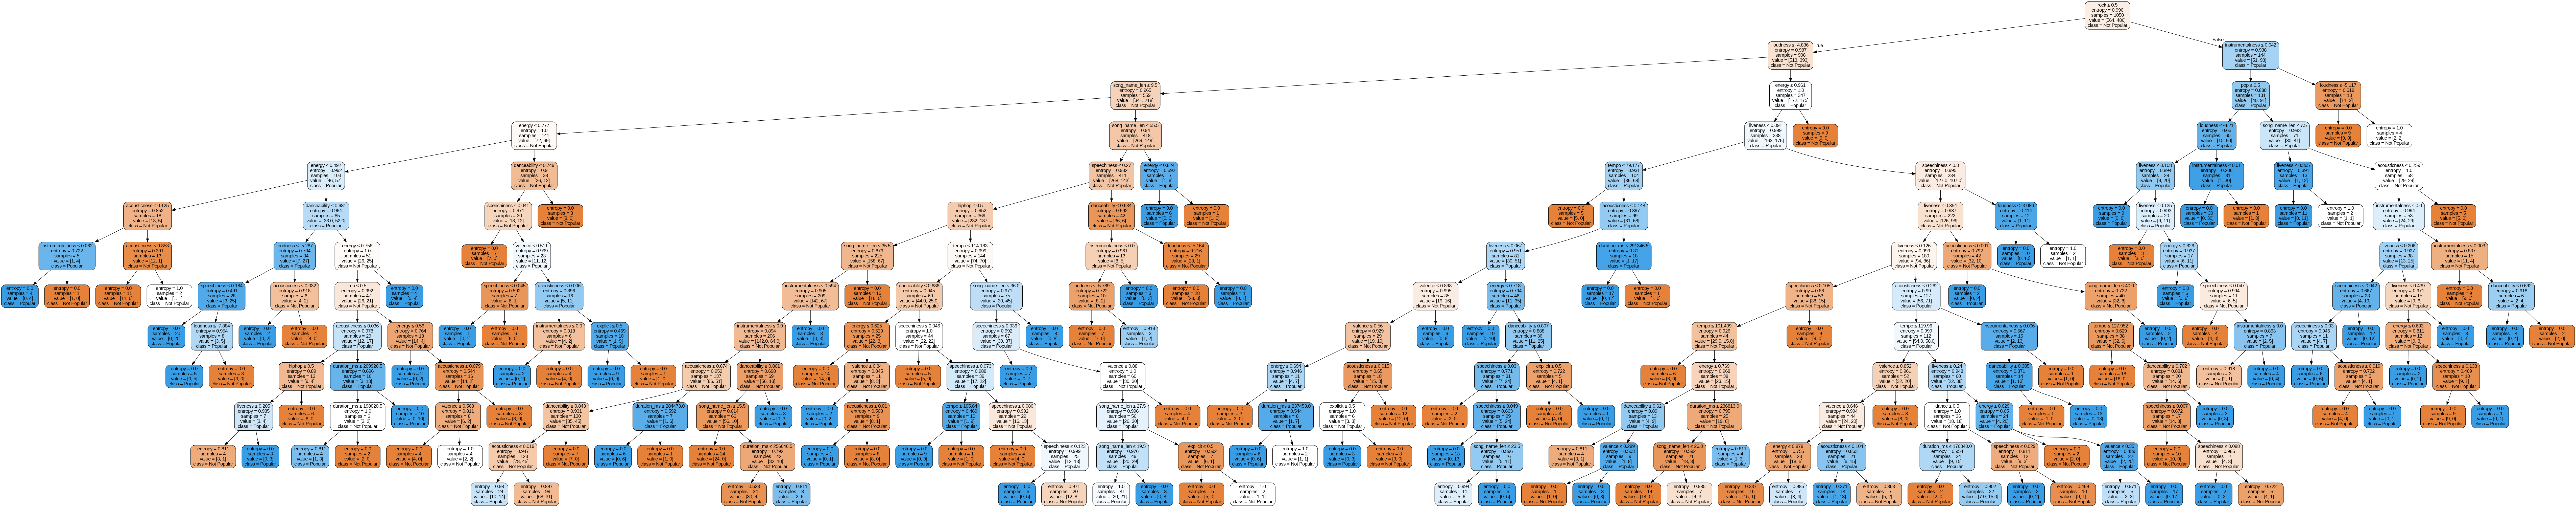

In [ ]:
###Figure visualization of our trained Decision Tree
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display



# Generate the DOT data for the tree
dot_data = export_graphviz(dt_clf,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create the Graphviz source object
decision_tree_graph = graphviz.Source(dot_data, format="png")
decision_tree_graph.render("decision_tree_graph")
# Display the decision tree within the notebook
display(Image(filename="decision_tree_graph.png"))




In [ ]:
##Uncomment this only if you want to save your decision tree image
##You need to create a folder called Image under My Drive first
#image_folder_path = '/content/drive/My Drive/Image/'
#decision_tree_graph.render(image_folder_path + "decision_tree_graph")

####Now lets evaluate our first decision tree

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        dt_clf.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

evaluation_metrics

Evaluation Metric     Value
0    Train Accuracy  0.889524
1     Test Accuracy  0.580000
2            Recall  0.561404
3         Precision  0.589862
4          F1 Score  0.575281

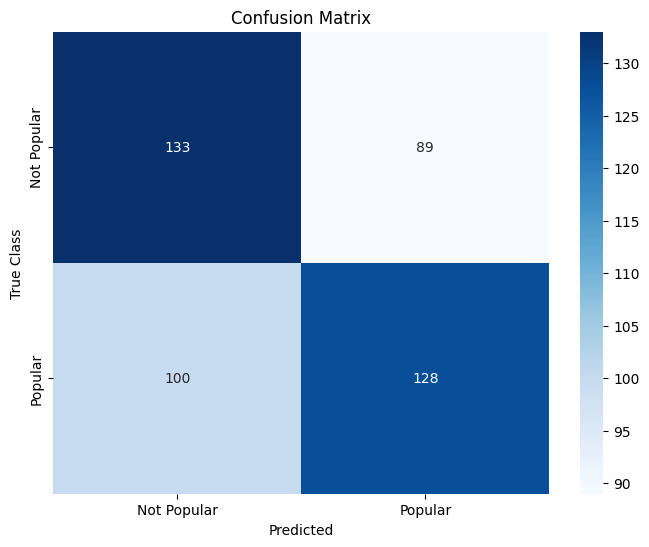

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))###change this number to adjust figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


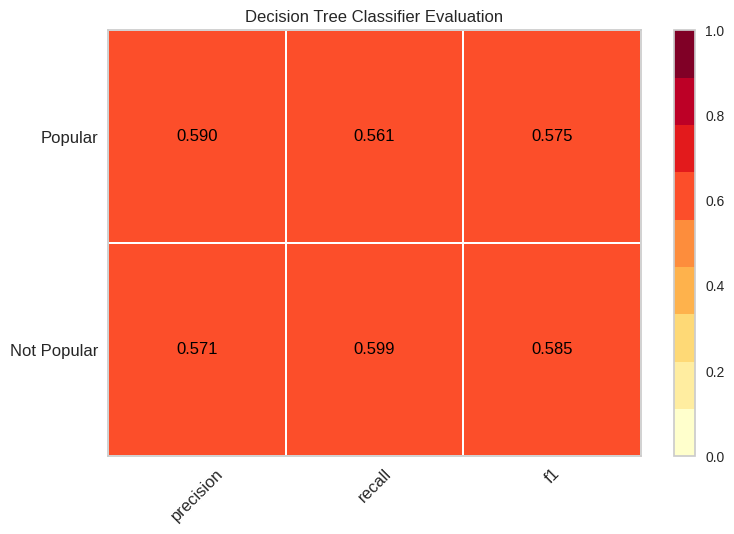

<Axes: title={'center': 'Decision Tree Classifier Evaluation'}>

In [ ]:
##Generate the evaluation figure for all the classes
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_clf, classes=class_names, support=False, title = "Decision Tree Classifier Evaluation")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.ax.set_xticklabels(['Precision', 'Recall', 'F1'])
visualizer.show()



####Feature importance for predicting target

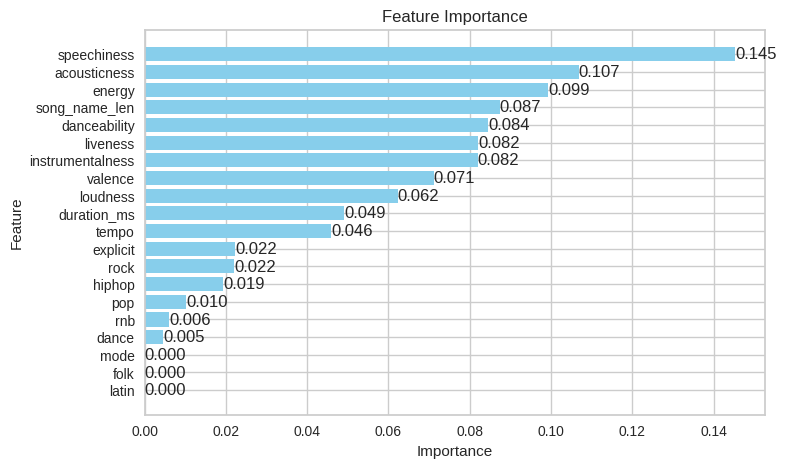

In [ ]:
#The feature importance values in a decision tree model indicate how much a particular feature contributes to the prediction of the target variable.
#The importance score is calculated based on how often and how effectively a feature is used to split the data
#Features that are used to split the data closer to the root of the tree or that result in greater reductions in entropy will have higher importance scores.
#The importance scores are typically normalized, meaning they sum up to 1 (or 100% when expressed as percentages).
#A higher score indicates a more important feature in determining the outcome of the target variable.


# Retrieve the feature importances from the trained model
feature_importances = dt_clf.feature_importances_
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 5))###########change this number to adjust figure size
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')    #.3f means the value is round up to 3 decimal places

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()


####Cross-Validation Evaluation on the training set

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict


# Perform cross-validation and get aggregated predictions across the entire training set
y_pred_cross = cross_val_predict(dt_clf, X_train, y_train, cv=5)


# Cross-Validation Results on Training Set
y_pred_cross = cross_val_predict(dt_clf, X_train, y_train, cv=5)

accuracy_cv = accuracy_score(y_train, y_pred_cross)
recall_cv = recall_score(y_train, y_pred_cross)
precision_cv = precision_score(y_train, y_pred_cross)
f1_cv = f1_score(y_train, y_pred_cross)
matrix_cv = confusion_matrix(y_train, y_pred_cross)

# Create DataFrame for evaluation metrics with cross-validation
evaluation_metrics_with_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_cv,
        accuracy_cv,  # Cross-validation doesn't separate train/test, so the same accuracy is used
        recall_cv,
        precision_cv,
        f1_cv
    ]
})

print("Performance Metrics With Cross-Validation:")
display(evaluation_metrics_with_cv)
print('\nConfusion Matrix CV:','\n', matrix_cv)


print("\nPerformance Metrics Without Cross-Validation:")
display(evaluation_metrics)
print('\nConfusion Matrix:','\n', conf_matrix)


## Alternatively, use cross_val_score to get the average performance metrics across folds/different data splits
# scores_acc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='accuracy')
#scores_rc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='recall')
#scores_prc = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='precision')
#scores_f1 = cross_val_score(dt_clf, X_train, y_train, cv=5, scoring='f1_macro')

#print('\nCross-Validation Scores on Training Set:')
#print('Average Accuracy: ', scores_acc.mean())
#print('Average Recall: ', scores_rc.mean())
#print('Average Precision: ', scores_prc.mean())
#print('Average F1-score: ', scores_f1.mean())


Performance Metrics With Cross-Validation:


Evaluation Metric_CV     Value
0       Train Accuracy  0.558095
1        Test Accuracy  0.558095
2               Recall  0.518519
3            Precision  0.522822
4             F1 Score  0.520661


Confusion Matrix CV: 
 [[334 230]
 [234 252]]

Performance Metrics Without Cross-Validation:


Evaluation Metric     Value
0    Train Accuracy  0.889524
1     Test Accuracy  0.580000
2            Recall  0.561404
3         Precision  0.589862
4          F1 Score  0.575281


Confusion Matrix: 
 [[133  89]
 [100 128]]


####Hyperparameter Fine-tuning (Pruning)

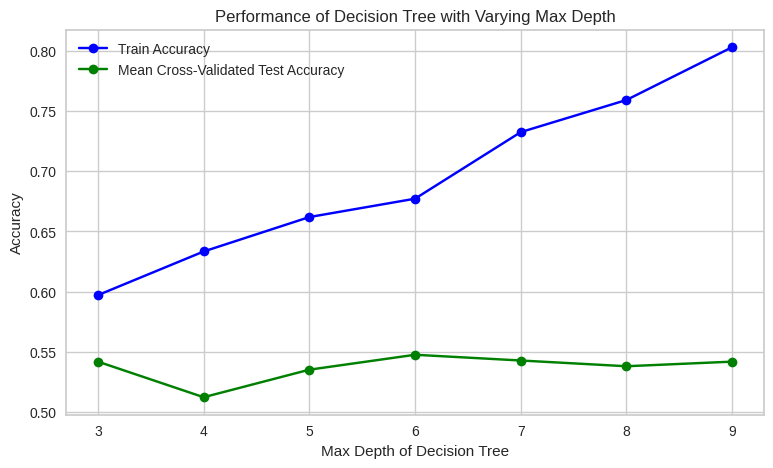

In [ ]:
# Define a range of max_depth values to evaluate
max_depth_range = range(3, 10)  # You can adjust the range as needed

# Lists to store performance metrics
train_accuracies = []
cv_test_accuracies = []

for depth in max_depth_range:
    # Initialize the model with the current max_depth
    dt_depth = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=1)

    # Train the model on the full training set
    dt_depth.fit(X_train, y_train)

    # Calculate training accuracy
    y_pred_train = dt_depth.predict(X_train)
    train_accuracies.append(accuracy_score(y_train, y_pred_train))

    # Perform cross-validation and calculate the mean accuracy
    cv_test_accuracy = cross_val_score(dt_depth, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_test_accuracies.append(cv_test_accuracy)

# Plot the performance metrics
plt.figure(figsize=(9, 5)) #################change this number to adjust figure size###########
plt.plot(max_depth_range, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(max_depth_range, cv_test_accuracies, label='Mean Cross-Validated Test Accuracy', marker='o', color='green')

plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Performance of Decision Tree with Varying Max Depth')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparameter_tuning_DT = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': [5,6,7,8],
              'min_samples_split': [5, 10, 20],
              'splitter': ['best'],}     # 'best': Selects the best split based on the highest information gain

grid_dt = GridSearchCV(hyperparameter_tuning_DT, param_grid = parameters, cv = 10 )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_CV_test_score'] = grid_dt.cv_results_['mean_test_score']
#result['std_test_score'] = grid_dt.cv_results_['std_test_score']
result.sort_values(by='mean_CV_test_score', ascending=False)

max_depth  min_samples_split splitter  mean_CV_test_score
6           7                  5     best            0.543810
0           5                  5     best            0.538095
1           5                 10     best            0.538095
7           7                 10     best            0.537143
3           6                  5     best            0.535238
2           5                 20     best            0.535238
8           7                 20     best            0.534286
4           6                 10     best            0.529524
11          8                 20     best            0.528571
10          8                 10     best            0.526667
9           8                  5     best            0.525714
5           6                 20     best            0.524762

#### Now let's fine-tune our decision tree model

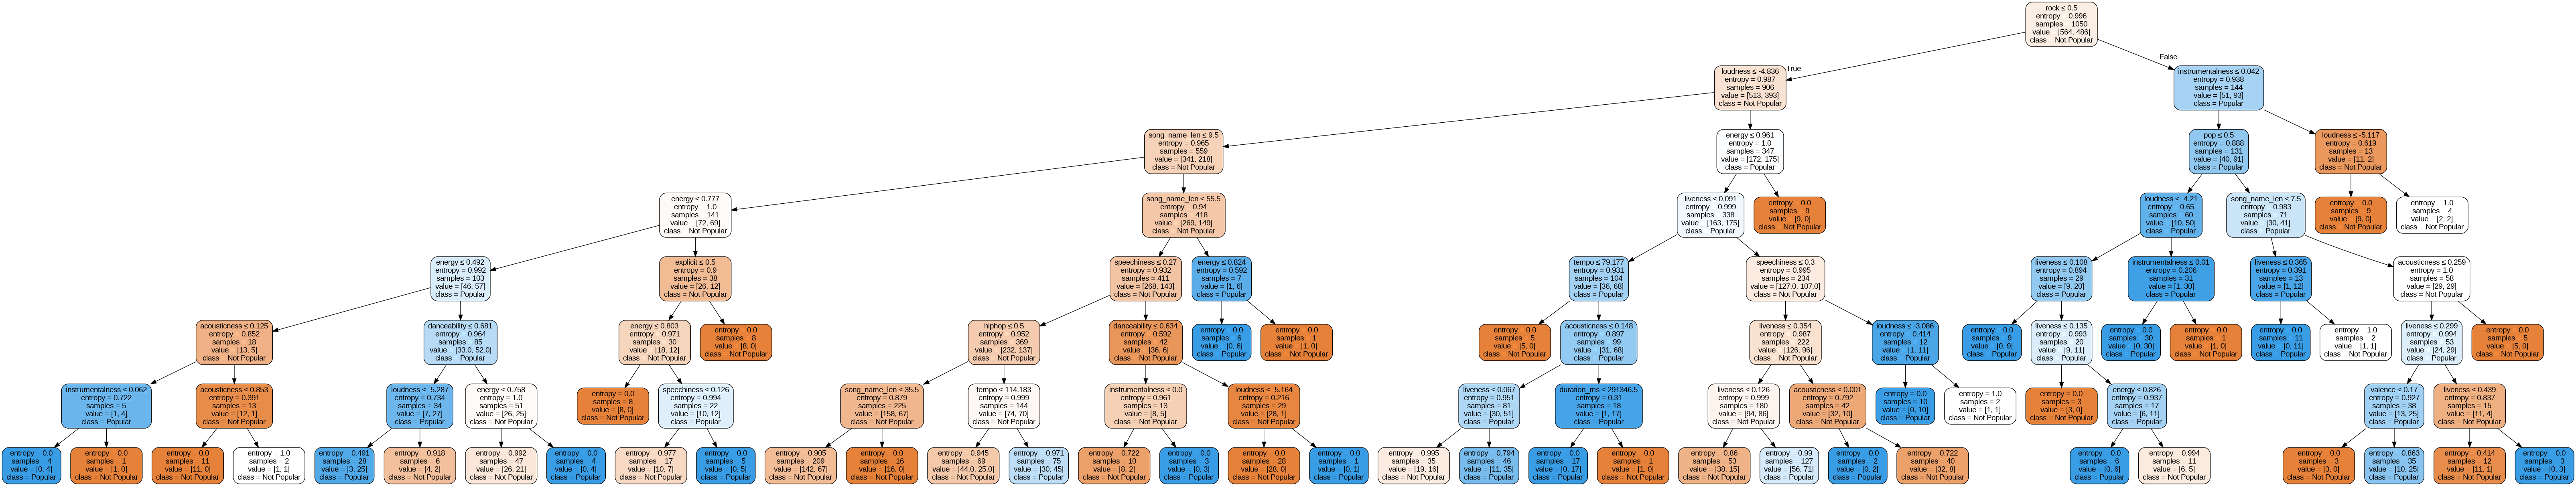

In [ ]:
dt_clf_tune = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split = 5, splitter= 'best', random_state=1)
dt_clf_tune = dt_clf_tune.fit(X_train, y_train)
y_pred_tune = dt_clf_tune.predict(X_test)


# Generate the DOT data for the tuned tree
dot_data_tune = export_graphviz(dt_clf_tune,
                           out_file=None,
                           feature_names=feature_names,
                           class_names=class_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create the Graphviz source object
decision_tree_graph_tune = graphviz.Source(dot_data_tune)

# Render the graph to a PNG image
decision_tree_graph_tune = graphviz.Source(dot_data_tune, format="png")
decision_tree_graph_tune.render("decision_tree_graph_tune")

# Display the image within the notebook
Image(filename="decision_tree_graph_tune.png")


In [ ]:
##Uncomment this only if you want to save your decision tree image
##You need to create a folder called Image under My Drive first
#image_folder_path = '/content/drive/My Drive/Image/'
#decision_tree_graph_tune.render(image_folder_path + "decision_tree_graph_tune")

#### Compare Performance: Original vs Tuned Decision Tree

In [ ]:
# Original Decision Tree Performance Metrics
train_accuracy_original = dt_clf.score(X_train, y_train)
test_accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)
confusion_matrix_original = confusion_matrix(y_test, y_pred)

# Tuned Decision Tree Performance Metrics
train_accuracy_tuned = dt_clf_tune.score(X_train, y_train)
test_accuracy_tuned = accuracy_score(y_test, y_pred_tune)
precision_tuned = precision_score(y_test, y_pred_tune)
recall_tuned = recall_score(y_test, y_pred_tune)
f1_tuned = f1_score(y_test, y_pred_tune)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tune)


# Create Comparison Table

# Create a DataFrame with the metrics
comparison_df = pd.DataFrame({
    'Evaluation Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original Decision Tree': [train_accuracy_original, test_accuracy_original, precision_original, recall_original, f1_original],
    'Tuned Decision Tree': [train_accuracy_tuned, test_accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
})

# Set precision for floating point numbers
pd.set_option("display.precision", 4)

# Display the comparison table

display(comparison_df)




Evaluation Metric  Original Decision Tree  Tuned Decision Tree
0    Train Accuracy                  0.8895               0.7295
1     Test Accuracy                  0.5800               0.5400
2         Precision                  0.5899               0.5561
3            Recall                  0.5614               0.4561
4          F1 Score                  0.5753               0.5012

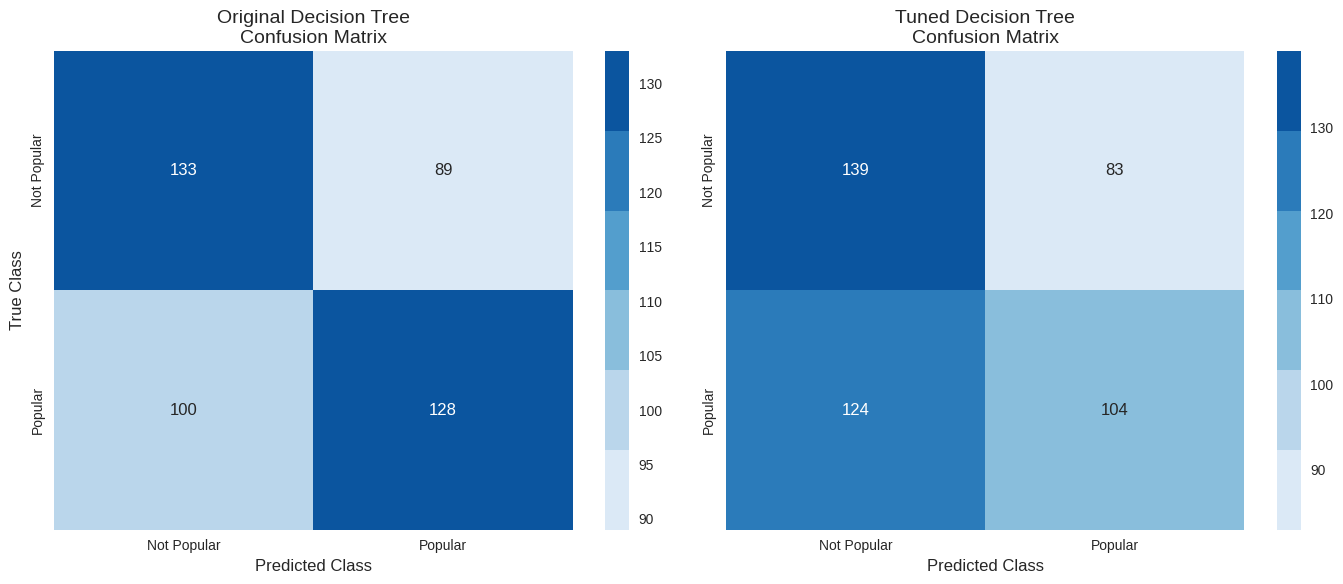

In [ ]:
# Compare Confusion Matrices

# Set up the matplotlib figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))####change figure size here

# Define a common color map
cmap = sns.color_palette("Blues")

# Plot Confusion Matrix for Original Decision Tree
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Original Decision Tree\nConfusion Matrix', fontsize=14)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('True Class', fontsize=12)

# Plot Confusion Matrix for Tuned Decision Tree
sns.heatmap(confusion_matrix_tuned, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned Decision Tree\nConfusion Matrix', fontsize=14)
axes[1].set_xlabel('Predicted Class', fontsize=12)
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

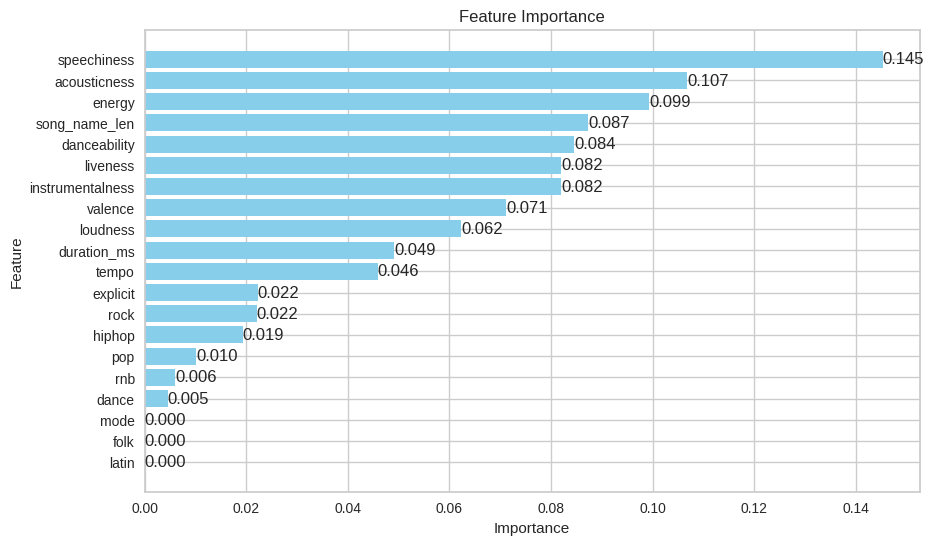

In [ ]:
# Let's check if the feature importance changes for the tuned model
# It should not change much because we only tuned the hyperparameters

feature_importances_tune = dt_clf_tune.feature_importances_

feature_importance_tune_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_tune_df = feature_importance_tune_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))###########change this number to adjust figure size
plt.barh(feature_importance_tune_df['Feature'], feature_importance_tune_df['Importance'], color='skyblue')

for index, value in enumerate(feature_importance_tune_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')    #.3f means the value is round up to 3 decimal places

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

## Q2.1 Decision Tree - Monetary Impact


In [ ]:
# Q2 Revenue/Cost Configuration
REVENUE_TP = 1000   # Revenue for correctly predicting a popular song
COST_FP = 700       # Cost for incorrectly predicting a song is popular
COST_FN = 900       # Cost for incorrectly predicting a song is not popular

# Function to calculate profit from a confusion matrix
def calculate_monetary_impact(conf_matrix, model_name="Model"):
    tn, fp, fn, tp = conf_matrix.ravel()

    revenue = tp * REVENUE_TP
    cost_fp = fp * COST_FP
    cost_fn = fn * COST_FN
    net_profit = revenue - (cost_fp + cost_fn)

    impact_df = pd.DataFrame({
        "Metric": ["True Positives (Revenue)", "False Positives (Cost)", "False Negatives (Cost)", "Net Profit"],
        model_name: [f"${revenue:,}", f"${cost_fp:,}", f"${cost_fn:,}", f"${net_profit:,}"]
    })

    return net_profit, impact_df

# Calculate monetary impact for both models
profit_original, impact_original = calculate_monetary_impact(confusion_matrix_original, "Original Decision Tree")
profit_tuned, impact_tuned = calculate_monetary_impact(confusion_matrix_tuned, "Tuned Decision Tree")

# Combine into one DataFrame
combined_impact = pd.concat([impact_original, impact_tuned.iloc[:, 1]], axis=1)

# Display monetary impact table
print("💰 Monetary Impact Analysis (Q2):")
display(combined_impact)

💰 Monetary Impact Analysis (Q2):


Metric Original Decision Tree Tuned Decision Tree
0  True Positives (Revenue)               $128,000            $104,000
1    False Positives (Cost)                $62,300             $58,100
2    False Negatives (Cost)                $90,000            $111,600
3                Net Profit               $-24,300            $-65,700

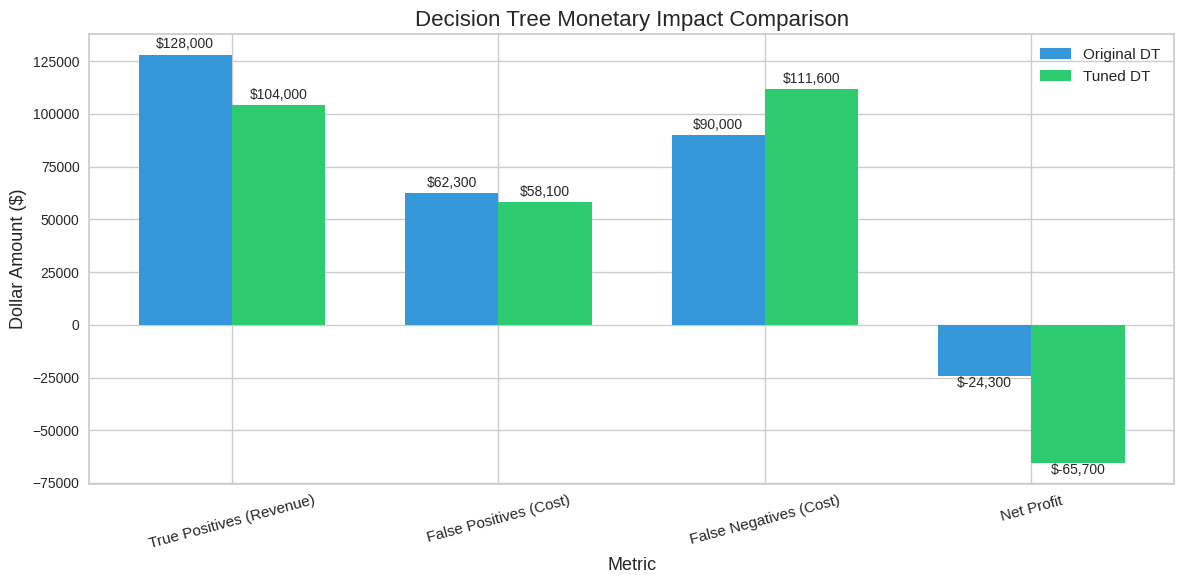

In [ ]:
# Optional: visualize comparison
categories = ["True Positives (Revenue)", "False Positives (Cost)", "False Negatives (Cost)", "Net Profit"]
original_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_original.iloc[:, 1]]
tuned_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_tuned.iloc[:, 1]]

x = range(len(categories))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, original_vals, width=bar_width, label="Original DT", color="#3498db")
plt.bar([p + bar_width for p in x], tuned_vals, width=bar_width, label="Tuned DT", color="#2ecc71")

plt.xlabel("Metric", fontsize=13)
plt.ylabel("Dollar Amount ($)", fontsize=13)
plt.title("Decision Tree Monetary Impact Comparison", fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], categories, rotation=15, fontsize=11)
plt.legend(fontsize=11)

# Add value labels
for i, v in enumerate(original_vals):
    plt.text(i, v + 3000 if v > 0 else v - 5000, f"${v:,}", ha='center', fontsize=10)
for i, v in enumerate(tuned_vals):
    plt.text(i + bar_width, v + 3000 if v > 0 else v - 5000, f"${v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Q1.2 KNN


In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

# For Google Colab integration
import os
from google.colab import drive

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_sub.drop('popularity_label', axis=1)  # Drop the target column to get independent variables
y = df_sub['popularity_label']  # Select the target column directly as our y

feature_names = X.columns.tolist()



class_names = target_label_encoder.inverse_transform(np.arange(len(target_label_encoder.classes_)))

##print out the features we selected for predictions and our classification target
print("features:",feature_names)
print("Classes:", class_names)


features: ['song_name_len', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']
Classes: ['Not Popular' 'Popular']


In [ ]:
#check our feature scale
X

song_name_len  duration_ms  explicit  danceability  energy  loudness  \
0              22.0     211160.0         0         0.751   0.834    -5.444   
1              20.0     167066.0         0         0.434   0.897    -4.918   
2               7.0     250546.0         0         0.529   0.496    -9.007   
3              12.0     224493.0         0         0.551   0.913    -4.063   
4              11.0     200560.0         0         0.614   0.928    -4.806   
...             ...          ...       ...           ...     ...       ...   
1495           31.0     185640.0         0         0.787   0.848    -4.696   
1496           16.0     192670.0         0         0.688   0.841    -5.217   
1497            8.0     217306.0         0         0.627   0.703    -4.884   
1498           11.0     269946.0         1         0.716   0.670    -5.779   
1499           15.0     222213.0         1         0.685   0.709    -3.578   

      mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0      0.0       0.0437        0.3000        1.7700e-05    0.3550    0.894   
1      1.0       0.0488        0.0103        0.0000e+00    0.6120    0.684   
2      1.0       0.0290        0.1730        0.0000e+00    0.2510    0.278   
3      0.0       0.0466        0.0263        1.3500e-05    0.3470    0.544   
4      0.0       0.0516        0.0408        1.0400e-03    0.0845    0.879   
...    ...          ...           ...               ...       ...      ...   
1495   1.0       0.0549        0.0915        0.0000e+00    0.1500    0.947   
1496   1.0       0.1790        0.2040        2.9500e-04    0.2290    0.743   
1497   1.0       0.2360        0.5630        0.0000e+00    0.0962    0.640   
1498   1.0       0.1940        0.2510        0.0000e+00    0.1090    0.124   
1499   0.0       0.0748        0.0132        0.0000e+00    0.4520    0.504   

        tempo  pop  rock  hiphop  dance  folk  rnb  latin  
0      95.053  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
1     148.726  1.0   1.0     0.0    0.0   0.0  0.0    0.0  
2     136.859  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
3     119.992  0.0   1.0     0.0    0.0   0.0  0.0    0.0  
4     172.656  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
...       ...  ...   ...     ...    ...   ...  ...    ...  
1495  121.989  1.0   0.0     0.0    1.0   0.0  0.0    0.0  
1496  133.912  1.0   0.0     0.0    0.0   0.0  0.0    0.0  
1497   81.897  1.0   0.0     1.0    0.0   0.0  0.0    0.0  
1498   86.010  1.0   0.0     1.0    0.0   0.0  0.0    0.0  
1499   93.047  1.0   0.0     0.0    0.0   0.0  0.0    0.0  

[1500 rows x 20 columns]

#### Standardizing the independent variable features to ensure they have the same scale

In [ ]:
# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

####Train our KNN model

In [ ]:
###the n we choose is 3 and the distance metric we choose is euclidean
knn_model = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

#check our trained knn
knn_model

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

####Evaluate our KNN model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a DataFrame for evaluation metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        knn_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

# Display the DataFrame
evaluation_metrics


Evaluation Metric   Value
0    Train Accuracy  0.7933
1     Test Accuracy  0.5289
2            Recall  0.4649
3         Precision  0.5408
4          F1 Score  0.5000

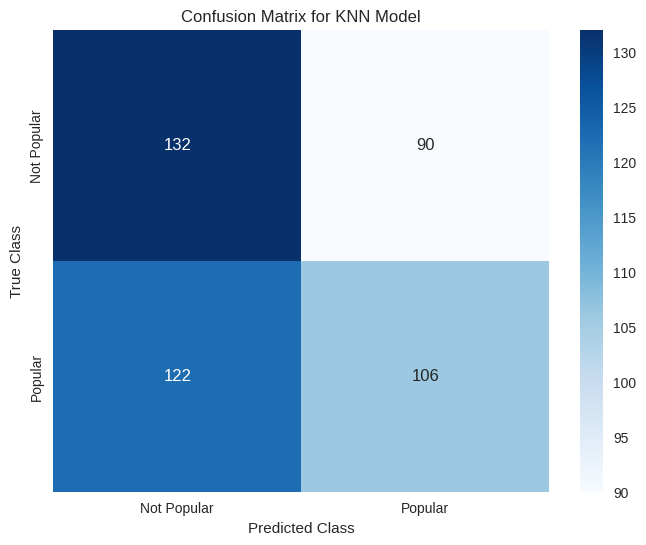

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for KNN Model')
plt.show()


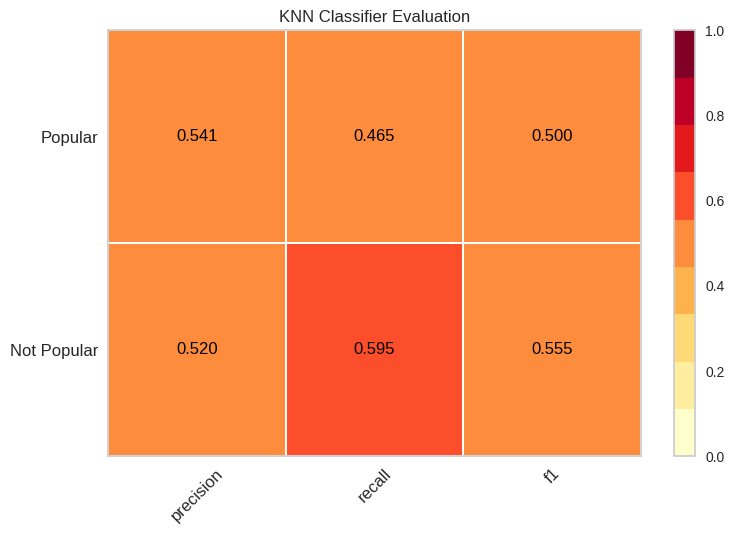

<Axes: title={'center': 'KNN Classifier Evaluation'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Create the classification report visualizer for the k-NN model
visualizer = ClassificationReport(knn_model, classes=class_names, support=False, title="KNN Classifier Evaluation")


visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)


# Display the plot
visualizer.show()


#### Performing cross-validation on the entire dataset to provide a general evaluation of the model's performance

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

#our original model n = 3 and distance metric is euclidean
CV_model = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')

# Cross-validate with 10 folds
y_pred_cross = cross_val_predict(CV_model, X, y, cv=10)

# Compute evaluation metrics for cross-validation
accuracy_cv = accuracy_score(y, y_pred_cross)
recall_cv = recall_score(y, y_pred_cross)
precision_cv = precision_score(y, y_pred_cross)
f1_cv = f1_score(y, y_pred_cross)
matrix_cv = confusion_matrix(y, y_pred_cross)


# Create DataFrame for evaluation metrics with cross-validation
evaluation_metrics_with_cv = pd.DataFrame({
    "Evaluation Metric_CV": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        accuracy_cv,
        recall_cv,
        precision_cv,
        f1_cv
    ]
})



# Display the metrics
print("Performance Metrics With Cross-Validation:")
display(evaluation_metrics_with_cv)
print('\nConfusion Matrix with CV:\n', matrix_cv)

print("\nPerformance Metrics Without Cross-Validation:")
display(evaluation_metrics)
print('\nConfusion Matrix Without CV:\n', conf_matrix)


Performance Metrics With Cross-Validation:


Evaluation Metric_CV   Value
0             Accuracy  0.5327
1               Recall  0.5364
2            Precision  0.5086
3             F1 Score  0.5222


Confusion Matrix with CV:
 [[416 370]
 [331 383]]

Performance Metrics Without Cross-Validation:


Evaluation Metric   Value
0    Train Accuracy  0.7933
1     Test Accuracy  0.5289
2            Recall  0.4649
3         Precision  0.5408
4          F1 Score  0.5000


Confusion Matrix Without CV:
 [[132  90]
 [122 106]]


####Note: k-NN does not provide feature importance because it relies purely on distance calculations between data points.

#### Unlike decision trees, k-NN does not use feature splits or calculate information gain to make predictions.


####Hyperparameter Fine-tuning (choosing the best n)

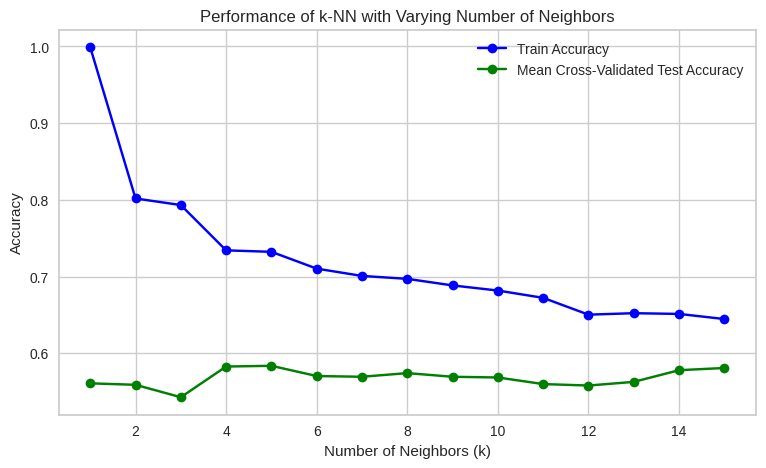

In [ ]:
n_neighbors_range = range(1, 16) #Here is the n range we would like to test; you can make adjustments here
train_accuracies = []
cv_test_accuracies = []

# Loop over different values of n_neighbors
for n in n_neighbors_range:
    hyperFT_model = KNeighborsClassifier(n_neighbors=n,metric = 'euclidean')

    # Fit the model on the training set
    hyperFT_model.fit(X_train, y_train)

    # Calculate training accuracy
    y_pred_train = hyperFT_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    # Perform cross-validation on the training set and calculate the mean accuracy
    cv_test_accuracy = cross_val_score(hyperFT_model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_test_accuracies.append(cv_test_accuracy)

# Plot the performance metrics
plt.figure(figsize=(9, 5))  # Adjust figure size as needed
plt.plot(n_neighbors_range, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(n_neighbors_range, cv_test_accuracies, label='Mean Cross-Validated Test Accuracy', marker='o', color='green')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Performance of k-NN with Varying Number of Neighbors')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#### Displaying the best hyperparameter combinations based on mean CV accuracy

In [ ]:

from sklearn.model_selection import GridSearchCV



hyperBC_model = KNeighborsClassifier()

# Define the hyperparameters to tune
parameters = {
    'n_neighbors': [4, 5, 8, 10, 13, 14],      # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight used in prediction
    'metric': ['euclidean'] # Distance metric for the tree
}

# Perform GridSearchCV with cross-validation (e.g., cv=5)
grid_knn = GridSearchCV(hyperBC_model, param_grid=parameters, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_knn.fit(X_train, y_train)

# Create a DataFrame to display the results
result = pd.DataFrame(grid_knn.cv_results_['params'])
result['mean_CV_test_score'] = grid_knn.cv_results_['mean_test_score']
result = result.sort_values(by='mean_CV_test_score', ascending=False)

# Display the sorted DataFrame of hyperparameter combinations and their CV scores
result


metric  n_neighbors   weights  mean_CV_test_score
3   euclidean            5  distance              0.5838
2   euclidean            5   uniform              0.5838
0   euclidean            4   uniform              0.5829
10  euclidean           14   uniform              0.5781
11  euclidean           14  distance              0.5771
4   euclidean            8   uniform              0.5743
1   euclidean            4  distance              0.5686
6   euclidean           10   uniform              0.5686
7   euclidean           10  distance              0.5667
5   euclidean            8  distance              0.5667
9   euclidean           13  distance              0.5667
8   euclidean           13   uniform              0.5629

####Now let's fine-tune with the best hyperparameters combined

In [ ]:
#Train the Tuned k-NN Model (with best hyperparameters)
tuned_knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
tuned_knn_model.fit(X_train, y_train)
y_pred_tuned = tuned_knn_model.predict(X_test)

tuned_knn_model

KNeighborsClassifier(metric='euclidean')

#### Compare Performance: Original vs Tuned KNN

In [ ]:
#Calculate performance metrics for our original model
train_accuracy_original = knn_model.score(X_train, y_train)
test_accuracy_original = accuracy_score(y_test, y_pred)
precision_original = precision_score(y_test, y_pred)
recall_original = recall_score(y_test, y_pred)
f1_original = f1_score(y_test, y_pred)
confusion_matrix_original = confusion_matrix(y_test, y_pred)

# Calculate Performance Metrics for the Tuned k-NN Model
train_accuracy_tuned = tuned_knn_model.score(X_train, y_train)
test_accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Create a Comparison Table for Evaluation Metrics
comparison_df = pd.DataFrame({
    'Evaluation Metric': ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Original k-NN': [train_accuracy_original, test_accuracy_original, precision_original, recall_original, f1_original],
    'Tuned k-NN': [train_accuracy_tuned, test_accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
})

# Set precision for floating point numbers
pd.set_option("display.precision", 4)

# Display the comparison table
display(comparison_df)

Evaluation Metric  Original k-NN  Tuned k-NN
0    Train Accuracy         0.7933      0.7324
1     Test Accuracy         0.5289      0.5444
2         Precision         0.5408      0.5578
3            Recall         0.4649      0.4868
4          F1 Score         0.5000      0.5199

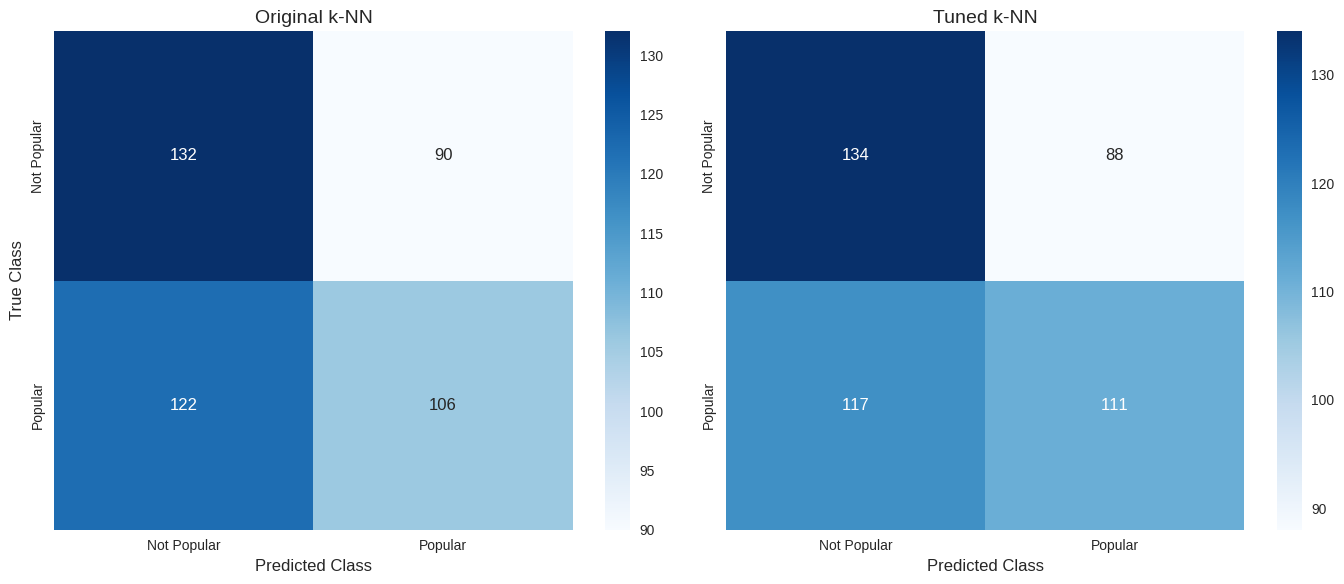

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust figure size as needed

# Plot Confusion Matrix for Original k-NN Model
sns.heatmap(confusion_matrix_original, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Original k-NN', fontsize=14)
axes[0].set_xlabel('Predicted Class', fontsize=12)
axes[0].set_ylabel('True Class', fontsize=12)

# Plot Confusion Matrix for Tuned k-NN Model
sns.heatmap(confusion_matrix_tuned, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned k-NN', fontsize=14)
axes[1].set_xlabel('Predicted Class', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Q2.2  KNN - Monetary Impact


In [ ]:
# Q2 Revenue/Cost Configuration
REVENUE_TP = 1000   # Revenue for correctly predicting a popular song
COST_FP = 700       # Cost for incorrectly predicting a song is popular
COST_FN = 900       # Cost for incorrectly predicting a song is not popular

# Function to calculate profit from a confusion matrix
def calculate_monetary_impact(conf_matrix, model_name="Model"):
    tn, fp, fn, tp = conf_matrix.ravel()

    revenue = tp * REVENUE_TP
    cost_fp = fp * COST_FP
    cost_fn = fn * COST_FN
    net_profit = revenue - (cost_fp + cost_fn)

    impact_df = pd.DataFrame({
        "Metric": ["True Positives (Revenue)", "False Positives (Cost)", "False Negatives (Cost)", "Net Profit"],
        model_name: [f"${revenue:,}", f"${cost_fp:,}", f"${cost_fn:,}", f"${net_profit:,}"]
    })

    return net_profit, impact_df

# Calculate monetary impact for both models
profit_original, impact_original = calculate_monetary_impact(confusion_matrix_original, "Original KNN")
profit_tuned, impact_tuned = calculate_monetary_impact(confusion_matrix_tuned, "Tuned KNN")

# Combine into one DataFrame
combined_impact = pd.concat([impact_original, impact_tuned.iloc[:, 1]], axis=1)

# Display monetary impact table
print("💰 Monetary Impact Analysis - KNN (Q2):")
display(combined_impact)

💰 Monetary Impact Analysis - KNN (Q2):


Metric Original KNN Tuned KNN
0  True Positives (Revenue)     $106,000  $111,000
1    False Positives (Cost)      $63,000   $61,600
2    False Negatives (Cost)     $109,800  $105,300
3                Net Profit     $-66,800  $-55,900

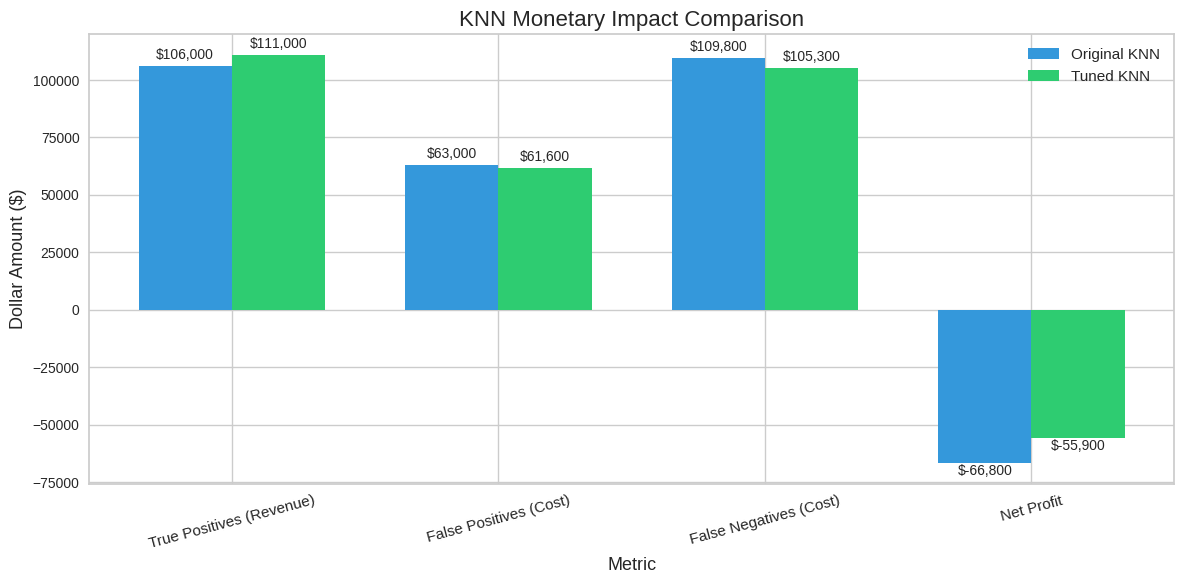

In [ ]:
# Optional: visualize comparison
categories = ["True Positives (Revenue)", "False Positives (Cost)", "False Negatives (Cost)", "Net Profit"]
original_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_original.iloc[:, 1]]
tuned_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_tuned.iloc[:, 1]]

x = range(len(categories))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, original_vals, width=bar_width, label="Original KNN", color="#3498db")
plt.bar([p + bar_width for p in x], tuned_vals, width=bar_width, label="Tuned KNN", color="#2ecc71")

plt.xlabel("Metric", fontsize=13)
plt.ylabel("Dollar Amount ($)", fontsize=13)
plt.title("KNN Monetary Impact Comparison", fontsize=16)
plt.xticks([p + bar_width / 2 for p in x], categories, rotation=15, fontsize=11)
plt.legend(fontsize=11)

# Add value labels
for i, v in enumerate(original_vals):
    plt.text(i, v + 3000 if v > 0 else v - 5000, f"${v:,}", ha='center', fontsize=10)
for i, v in enumerate(tuned_vals):
    plt.text(i + bar_width, v + 3000 if v > 0 else v - 5000, f"${v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Q1.3 Logistic Regression


In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For model training and evaluation
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
%matplotlib inline

# For Google Colab integration
import os
from google.colab import drive

###Multicollinearity check

VIF stands for Variance Inflation Factor, measures how much the variance of a regression coefficient is inflated due to multicollinearity with other variables in the model.

It is used to detect the presence of multicollinearity in a regression analysis. Multicollinearity occurs when two or more predictor variables (independent variables) in a regression model are highly correlated, meaning that they provide redundant information and affect the reliability of the regression coefficients.

VIF = 1: No multicollinearity. The predictor is not correlated with any other variables.

VIF between 1 and 5: Moderate multicollinearity. Generally acceptable, though closer to 5 might be a concern.

VIF > 5: High multicollinearity. The predictor is highly correlated with other predictors, which may affect the reliability of the coefficient estimates.

VIF > 10: Severe multicollinearity. The predictor is very highly correlated with other variables, and steps should be taken to reduce multicollinearity (e.g., removing one of the correlated variables).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_sub.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_sub.values, i)
                          for i in range(len(df_sub.columns))]

print(vif_data)

             feature      VIF
0      song_name_len   3.4762
1        duration_ms  33.4754
2           explicit   2.0653
3       danceability  30.9819
4             energy  33.5476
5           loudness  11.8478
6               mode   2.3184
7        speechiness   3.0135
8       acousticness   1.8320
9   instrumentalness   1.1178
10          liveness   2.7697
11           valence  12.0742
12             tempo  20.9781
13               pop   6.3900
14              rock   1.5776
15            hiphop   2.6260
16             dance   1.4961
17              folk   1.0408
18               rnb   1.7641
19             latin   1.0794
20  popularity_label   2.0125


In [ ]:
df_sub_2 = df_sub[['song_name_len', 'explicit', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'pop','hiphop', 'rock', 'folk', 'dance',
    'rnb', 'latin','valence','popularity_label']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_sub_2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_sub_2.values, i)
                          for i in range(len(df_sub_2.columns))]

print(vif_data)

             feature     VIF
0      song_name_len  3.2165
1           explicit  1.9584
2               mode  2.1681
3        speechiness  2.9395
4       acousticness  1.5411
5   instrumentalness  1.0732
6           liveness  2.5322
7                pop  4.9529
8             hiphop  2.5490
9               rock  1.3350
10              folk  1.0313
11             dance  1.4152
12               rnb  1.6865
13             latin  1.0774
14           valence  5.7734
15  popularity_label  1.8743


### Define features (X) and target (y)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_sub.drop('popularity_label', axis=1)  # Drop the target column to get independent variables
y = df_sub['popularity_label']  # Select the target column directly as our y

feature_names = X.columns.tolist()



class_names = target_label_encoder.inverse_transform(np.arange(len(target_label_encoder.classes_)))

##print out the features we selected for predictions and our classification target
print("features:",feature_names)
print("Classes:", class_names)

features: ['song_name_len', 'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']
Classes: ['Not Popular' 'Popular']


In [ ]:
# Standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Train our logit model

In [ ]:
# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)


# Create a DataFrame for evaluation metrics
evaluation_metrics = pd.DataFrame({
    "Evaluation Metric": ["Train Accuracy", "Test Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [
        logistic_model.score(X_train, y_train),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

# Display the DataFrame with evaluation metrics
print("Logistic Regression Evaluation Metrics:")
display(evaluation_metrics)


Logistic Regression Evaluation Metrics:


Evaluation Metric   Value
0    Train Accuracy  0.6362
1     Test Accuracy  0.5956
2            Recall  0.4825
3         Precision  0.6322
4          F1 Score  0.5473

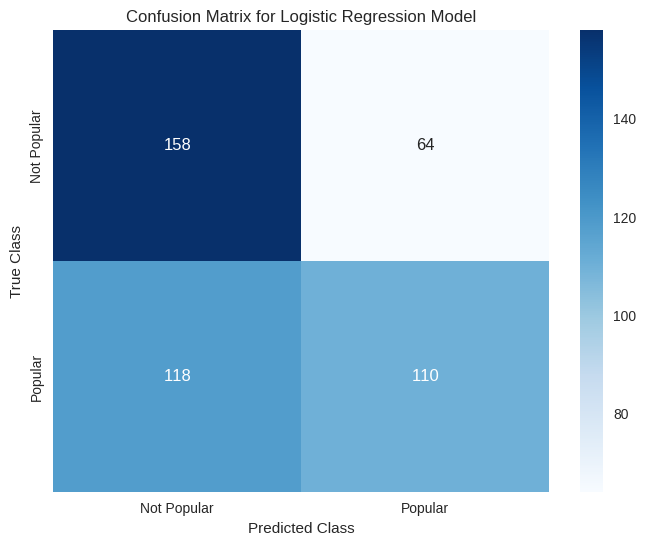

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

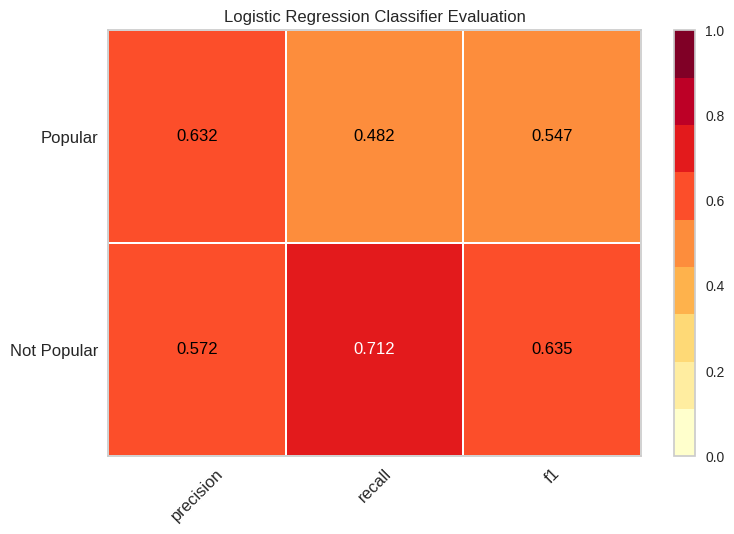

<Axes: title={'center': 'Logistic Regression Classifier Evaluation'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

# Create the classification report visualizer for the Logistic Regression model
visualizer = ClassificationReport(logistic_model, classes=class_names, support=False, title="Logistic Regression Classifier Evaluation")

# Fit the visualizer
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

# Display the plot
visualizer.show()


###This method provides a more detailed statistical summary, including p-values and other key metrics.

In [ ]:
# Train the Logistic Regression model using statsmodels
model_sm = sm.Logit(y_train, X_train)
results = model_sm.fit(method="newton")

# Create a summary with the feature names
features = feature_names
print(results.summary2(xname=features))


###Use P-value for statistically significant
##LLR p-value is the overall significance of the logit regression model
##p-value for each feauture is the feature significance for prediction
##p-value <0.01 <0.05 <0.10 if p-value >= 0.10 no evidence of stats significant
##LL-null is the baseline reference model
##R^2 how much better the model performs

Optimization terminated successfully.
         Current function value: 0.656953
         Iterations 5
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: popularity_label Pseudo R-squared: 0.048     
Date:               2025-04-24 18:53 AIC:              1419.6011 
No. Observations:   1050             BIC:              1518.7320 
Df Model:           19               Log-Likelihood:   -689.80   
Df Residuals:       1030             LL-Null:          -724.90   
Converged:          1.0000           LLR p-value:      8.4927e-08
No. Iterations:     5.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
song_name_len     -0.1288   0.0660 -1.9511 0.0511 -0.2582  0.0006
duration_ms        0.0694   0.0679  1.0210 0.3073 -0.0638  0.2025


In [ ]:
# Get the coefficients for each feature
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the feature names and their corresponding coefficients
feature_impact = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)   # Convert odds ratios using the exponential function (e^x)
})

feature_impact = feature_impact.sort_values(by='Odds Ratio', ascending=False)
display(feature_impact)

Feature  Coefficient  Odds Ratio
5           loudness       0.3200      1.3771
14              rock       0.2603      1.2974
15            hiphop       0.2464      1.2793
12             tempo       0.1838      1.2017
8       acousticness       0.0838      1.0874
1        duration_ms       0.0687      1.0711
11           valence       0.0257      1.0260
19             latin       0.0010      1.0010
3       danceability      -0.0147      0.9854
17              folk      -0.0243      0.9760
10          liveness      -0.0736      0.9290
9   instrumentalness      -0.0766      0.9262
7        speechiness      -0.0817      0.9215
6               mode      -0.0972      0.9074
13               pop      -0.1015      0.9034
2           explicit      -0.1097      0.8961
0      song_name_len      -0.1277      0.8802
16             dance      -0.1390      0.8702
18               rnb      -0.1792      0.8360
4             energy      -0.1922      0.8251

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict


model_cv = LogisticRegression()

# Perform cross-validation and get aggregated predictions
y_pred_cross = cross_val_predict(model_cv, X, y, cv=10)

# Calculate evaluation metrics
accuracy_cv = accuracy_score(y, y_pred_cross)
recall_cv = recall_score(y, y_pred_cross)
precision_cv = precision_score(y, y_pred_cross)
f1_cv = f1_score(y, y_pred_cross)
matrix_cv = confusion_matrix(y, y_pred_cross)

# Create a DataFrame for evaluation metrics with cross-validation
evaluation_metrics_cv = pd.DataFrame({
    "Evaluation Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Value": [accuracy_cv, recall_cv, precision_cv, f1_cv]
})

print("Performance Metrics With Cross-Validation:")
display(evaluation_metrics_cv)


print("\nConfusion Matrix - Cross Validation:\n", matrix_cv)



# Display the evaluation metrics without CV
print("\nLogistic Regression Evaluation Metrics without CV:")
display(evaluation_metrics)
print("\nConfusion Matrix - Without CV:\n", conf_matrix)



Performance Metrics With Cross-Validation:


Evaluation Metric   Value
0          Accuracy  0.5780
1            Recall  0.4986
2         Precision  0.5642
3          F1 Score  0.5294


Confusion Matrix - Cross Validation:
 [[511 275]
 [358 356]]

Logistic Regression Evaluation Metrics without CV:


Evaluation Metric   Value
0    Train Accuracy  0.6362
1     Test Accuracy  0.5956
2            Recall  0.4825
3         Precision  0.6322
4          F1 Score  0.5473


Confusion Matrix - Without CV:
 [[158  64]
 [118 110]]


## Q2.3  Logistic Regression - Monetary Impact


In [ ]:
# Q2 Revenue/Cost Configuration
REVENUE_TP = 1000   # Correctly predicted popular song
COST_FP = 700       # Incorrectly predicted popular
COST_FN = 900       # Missed popular song

# Function to calculate profit/cost from a confusion matrix
def calculate_monetary_impact(conf_matrix, model_name="Model"):
    tn, fp, fn, tp = conf_matrix.ravel()

    revenue = tp * REVENUE_TP
    cost_fp = fp * COST_FP
    cost_fn = fn * COST_FN
    net_profit = revenue - (cost_fp + cost_fn)

    impact_df = pd.DataFrame({
        "Metric": ["True Positives (Revenue)", "False Positives (Cost)", "False Negatives (Cost)", "Net Profit"],
        model_name: [f"${revenue:,}", f"${cost_fp:,}", f"${cost_fn:,}", f"${net_profit:,}"]
    })

    return net_profit, impact_df

In [ ]:
# Apply to holdout (non-CV)
profit_holdout, impact_holdout = calculate_monetary_impact(conf_matrix, model_name="Logistic Regression (Holdout)")

# Apply to cross-validation
profit_cv, impact_cv = calculate_monetary_impact(matrix_cv, model_name="Logistic Regression (CV)")

# Combine both side by side
combined_logit_impact = pd.concat([impact_holdout, impact_cv.iloc[:, 1]], axis=1)

# Display the results
print("💰 Logistic Regression: Monetary Impact Analysis")
display(combined_logit_impact)

💰 Logistic Regression: Monetary Impact Analysis


Metric Logistic Regression (Holdout)  \
0  True Positives (Revenue)                      $110,000   
1    False Positives (Cost)                       $44,800   
2    False Negatives (Cost)                      $106,200   
3                Net Profit                      $-41,000   

  Logistic Regression (CV)  
0                 $356,000  
1                 $192,500  
2                 $322,200  
3                $-158,700

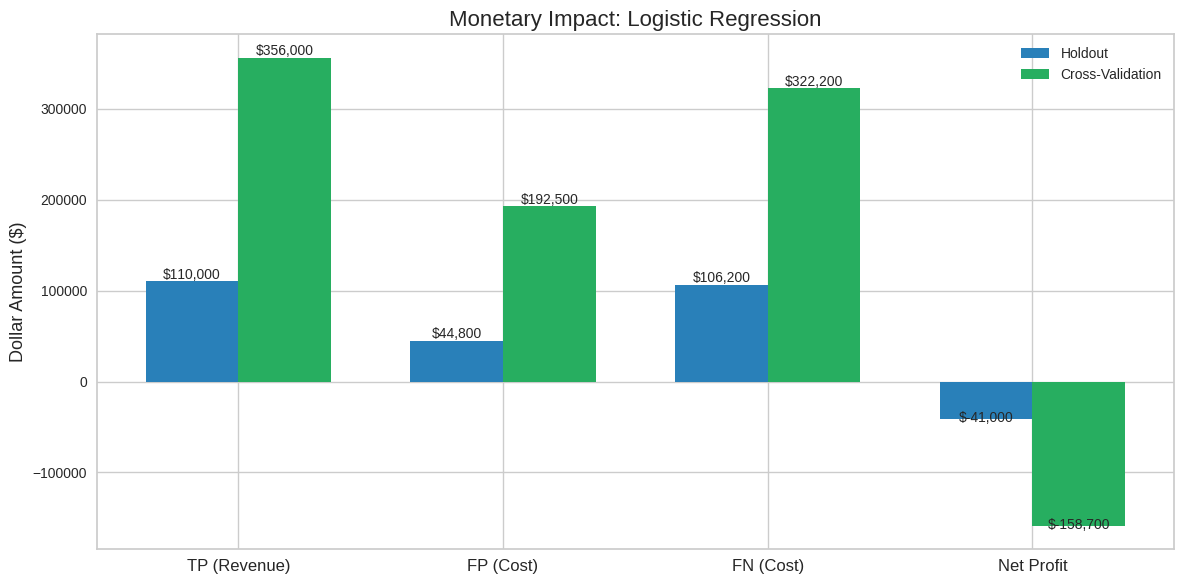

In [ ]:
# Values for plotting
labels = ["TP (Revenue)", "FP (Cost)", "FN (Cost)", "Net Profit"]
holdout_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_holdout.iloc[:, 1]]
cv_vals = [int(val.replace("$", "").replace(",", "")) for val in impact_cv.iloc[:, 1]]

x = range(len(labels))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, holdout_vals, width=bar_width, label="Holdout", color="#2980b9")
plt.bar([i + bar_width for i in x], cv_vals, width=bar_width, label="Cross-Validation", color="#27ae60")

plt.xticks([i + bar_width / 2 for i in x], labels, fontsize=12)
plt.ylabel("Dollar Amount ($)", fontsize=13)
plt.title("Monetary Impact: Logistic Regression", fontsize=16)
plt.legend()

# Add bar annotations
for i, v in enumerate(holdout_vals):
    plt.text(i, v + (3000 if v > 0 else -3000), f"${v:,}", ha='center', fontsize=10)
for i, v in enumerate(cv_vals):
    plt.text(i + bar_width, v + (3000 if v > 0 else -3000), f"${v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Q3 [30%]. The company is also interested in understanding 1) the effects of valence of a song in
predicting the song’s success and whether the effect differs across different types of music. 2)
Which features or combinations of features are frequently associated with popularity of songs.
This analysis would help improve their playlist recommendations by identifying similar songs
based on these patterns.
1. Cluster all the songs in the datasets by danceability and energy (You may also include
genre (pop, rock, hiphop, dance, folk, rnb, latin) in the clustering process, but this is
optional)
2. For each cluster identified, examine the cluster characteristics and develop an appropriate
model that examines the impact of valence on the song’s success.
3. Interpret the results and describe the managerial insights

In [ ]:
# For Google Colab integration
import os
from google.colab import drive
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

# For data manipulation
import pandas as pd
import numpy as np

##install the pywaffle package for visualization
!pip install pywaffle matplotlib
from pywaffle import Waffle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Select variables of interest

In [ ]:
df_clustering= df_sub[['danceability', 'energy', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']]

####Normalize the data (or Standardize if needed)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# data normalization
norm_scaler = MinMaxScaler()
data_norm = norm_scaler.fit_transform(df_clustering)
##data_norm is the normalized data


####Look for the largest vertical gap as this indicates a significant increase in dissimilarity between clusters.
####Cut before the large vertical gap to avoid merging clusters that are too dissimilar and should remain separate.

####View it in Dendrogram

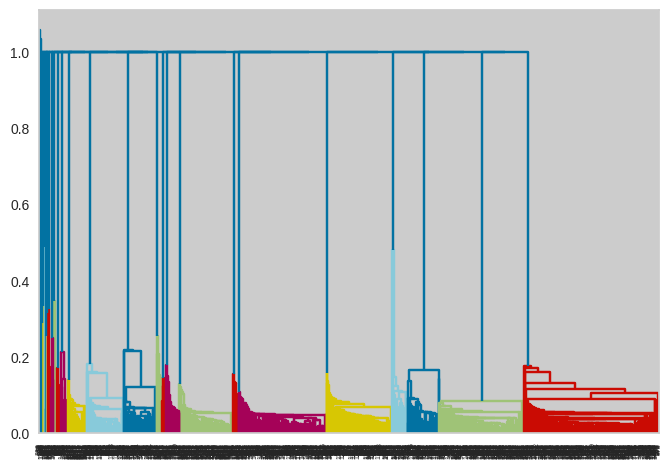

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_norm, 'single')


dendrogram(linked,
           orientation='top',
           show_leaf_counts=True)
plt.show()

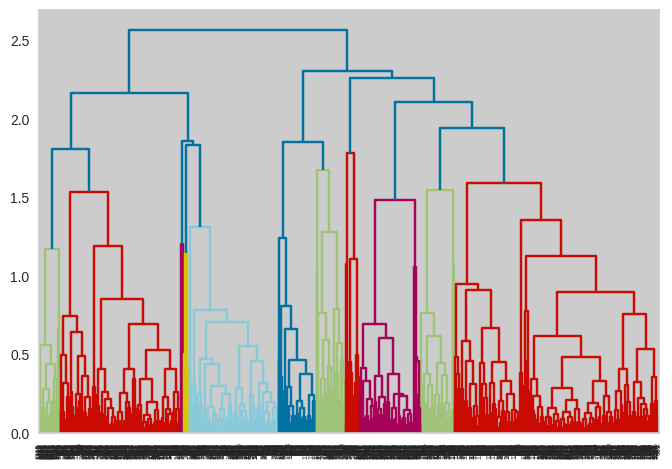

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_norm, 'complete')


dendrogram(linked,
           orientation='top',
           show_leaf_counts=True)
plt.show()

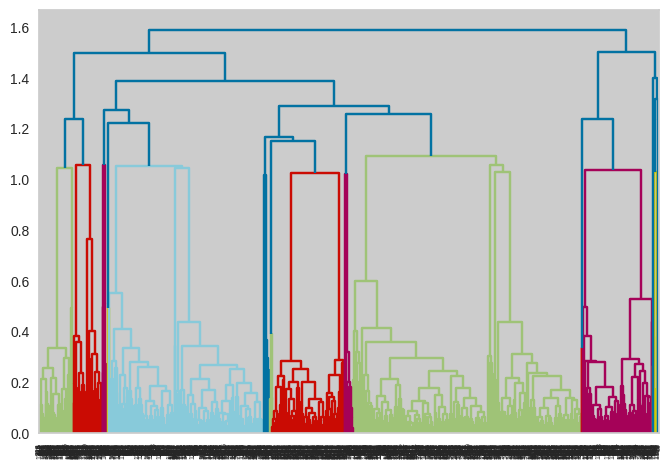

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data_norm, 'average')


dendrogram(linked,
           orientation='top',
           show_leaf_counts=True)
plt.show()

####Calculate Silhouette score

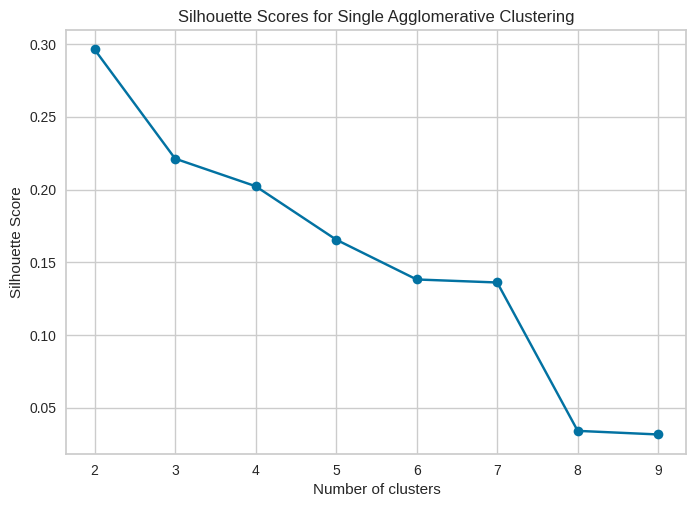

In [ ]:
silhouette_scores = []
range_n_clusters = list(range(2, 10))  #You can adjust the number here for the range you want to test

for n_clusters in range_n_clusters:
    # Fit Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    cluster_labels = agglom.fit_predict(data_norm)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different cluster numbers
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Single Agglomerative Clustering")
plt.show()



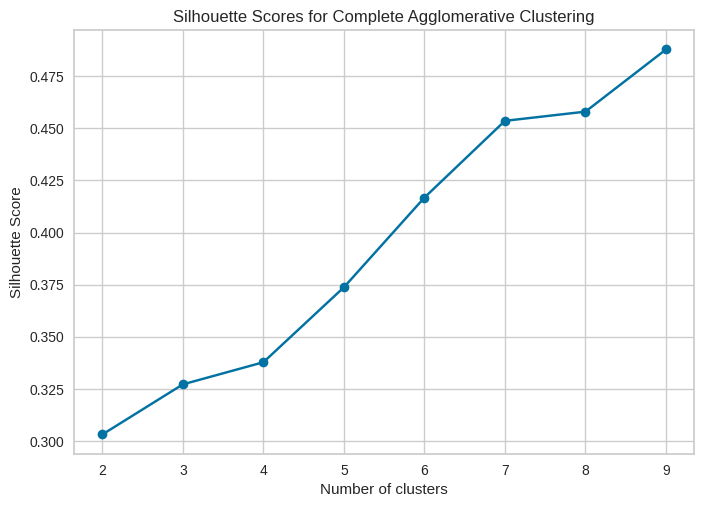

In [ ]:
silhouette_scores = []
range_n_clusters = list(range(2, 10))  #You can adjust the number here for the range you want to test

for n_clusters in range_n_clusters:
    # Fit Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
    cluster_labels = agglom.fit_predict(data_norm)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different cluster numbers
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Complete Agglomerative Clustering")
plt.show()


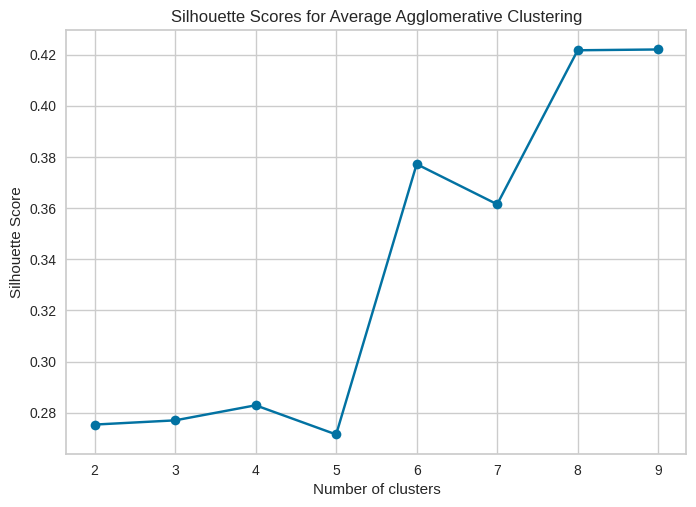

In [ ]:
silhouette_scores = []
range_n_clusters = list(range(2, 10))  #You can adjust the number here for the range you want to test

for n_clusters in range_n_clusters:
    # Fit Agglomerative Clustering
    agglom = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    cluster_labels = agglom.fit_predict(data_norm)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(data_norm, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different cluster numbers
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Average Agglomerative Clustering")
plt.show()

####Apply Agglomerative cluster

In [ ]:
# Apply Agglomerative Clustering
AGNES_MIN= AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single') ###adjust your number of clusters
df_min = df_clustering.copy()
df_min['cluster'] = AGNES_MIN.fit_predict(data_norm)



<ipython-input-120-41acfdcad991>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



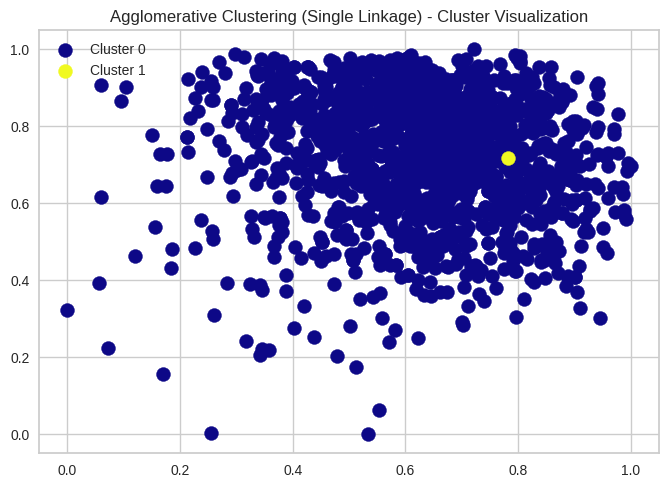

In [ ]:
# Plot clusters
unique_clusters = np.unique(df_min['cluster'])  # Find unique cluster labels
colors = plt.cm.get_cmap('plasma', len(unique_clusters))

for cluster_id in unique_clusters:
    plt.scatter(data_norm[df_min['cluster'] == cluster_id, 0],
                data_norm[df_min['cluster'] == cluster_id, 1],
                s=100, c=[colors(cluster_id)], label=f'Cluster {cluster_id}')

plt.legend()
plt.title("Agglomerative Clustering (Single Linkage) - Cluster Visualization")
plt.show()

In [ ]:
# Apply Agglomerative Clustering
AGNES_AVG= AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='average')####Adjust your number of clusters
df_avg = df_clustering.copy()
df_avg['cluster'] = AGNES_AVG.fit_predict(data_norm)

<ipython-input-122-d7390c0af51e>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



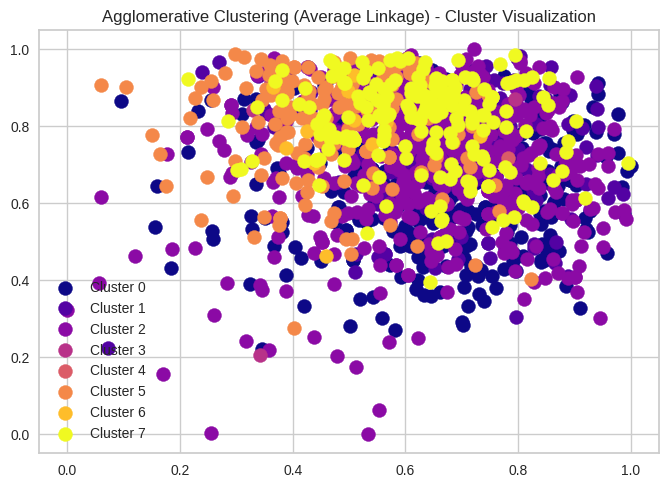

In [ ]:
# Plot clusters
unique_clusters = np.unique(df_avg['cluster'])  # Find unique cluster labels
colors = plt.cm.get_cmap('plasma', len(unique_clusters))

for cluster_id in unique_clusters:
    plt.scatter(data_norm[df_avg['cluster'] == cluster_id, 0],
                data_norm[df_avg['cluster'] == cluster_id, 1],
                s=100, c=[colors(cluster_id)], label=f'Cluster {cluster_id}')

plt.legend()
plt.title("Agglomerative Clustering (Average Linkage) - Cluster Visualization")
plt.show()

In [ ]:
# Apply Agglomerative Clustering
AGNES_MAX= AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='complete') ###adjust your number of clusters
df_max = df_clustering.copy()
df_max['cluster'] = AGNES_MAX.fit_predict(data_norm)

<ipython-input-124-c838900a1042>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



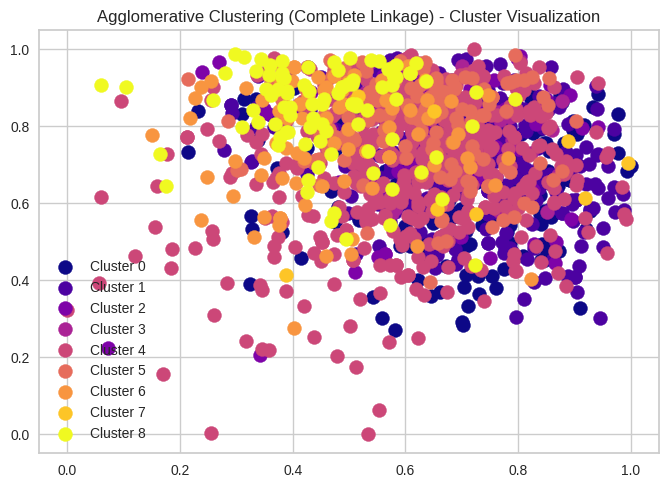

In [ ]:
# Plot clusters
unique_clusters = np.unique(df_max['cluster'])  # Find unique cluster labels
colors = plt.cm.get_cmap('plasma', len(unique_clusters))

for cluster_id in unique_clusters:
    plt.scatter(data_norm[df_max['cluster'] == cluster_id, 0],
                data_norm[df_max['cluster'] == cluster_id, 1],
                s=100, c=[colors(cluster_id)], label=f'Cluster {cluster_id}')

plt.legend()
plt.title("Agglomerative Clustering (Complete Linkage) - Cluster Visualization")
plt.show()

In [ ]:
# Calculate silhouette score and silhouette samples
silhouette_avg_min = silhouette_score(data_norm, df_min['cluster'])
sample_silhouette_values_min = silhouette_samples(data_norm, df_min['cluster'])

# Print the average silhouette score
print(f"Average silhouette score for Single Linkage: {silhouette_avg_min}")


# Optionally, you can print silhouette samples
#print("Sample silhouette values:")
#print(sample_silhouette_values_min)

Average silhouette score for Single Linkage: 0.29629741487116423


In [ ]:
# Calculate silhouette score and silhouette samples
silhouette_avg_max = silhouette_score(data_norm, df_max['cluster'])
sample_silhouette_values_max = silhouette_samples(data_norm, df_max['cluster'])

# Print the average silhouette score
print(f"Average silhouette score for complete linkage: {silhouette_avg_max }")

# Optionally, you can print silhouette samples
#print("Sample silhouette values:")
#print(sample_silhouette_values_max)

Average silhouette score for complete linkage: 0.4877717436461


In [ ]:
# Calculate silhouette score and silhouette samples
silhouette_avg_avg = silhouette_score(data_norm, df_avg['cluster'])
sample_silhouette_values_avg = silhouette_samples(data_norm, df_avg['cluster'])

# Print the average silhouette score
print(f"Average silhouette score for average linkage: {silhouette_avg_avg}")

# Optionally, you can print or explore silhouette samples
#print("Sample silhouette values:")
#print(sample_silhouette_values_avg)

Average silhouette score for average linkage: 0.4217204669533012


####We need to understand the detailed stats inside each cluster

In [ ]:
##You do not need to change anything here! but if you do not like the color you can change the color here
def generate_cluster_profile_agnes(data_norm, k, df_original, metrics_select, linkage_used):

    # Apply AgglomerativeClustering (AGNES) with customizable metrics and linkage
    agnes_stats = AgglomerativeClustering(n_clusters=k, metric=metrics_select, linkage=linkage_used)
    df_sub = df_original.copy()
    df_sub['cluster'] = agnes_stats.fit_predict(data_norm)

    # Create a copy of the DataFrame for calculations
    df_calculate = df_sub.copy()
    df_calculate['cluster_result'] = 'Cluster ' + (df_calculate['cluster']).astype(str)

    # Exclude the 'cluster' column for mean calculation
    df_mean_calculation = df_calculate.drop(columns=['cluster'])
    df_mean_feature = df_mean_calculation.drop(columns=['cluster_result'])  # Exclude 'cluster_result' column for overall mean

    # Calculate Overall Mean for All Features in df_mean_feature
    overall_means = df_mean_feature.mean().to_frame().T
    overall_means.index = ['Overall']

    # Summarize Mean of Each Cluster
    df_cluster_summary = df_mean_calculation.groupby('cluster_result').mean()

    # Add Overall Mean Row to Cluster Summary
    df_profile = pd.concat([df_cluster_summary, overall_means], axis=0)

    # Calculate the count of items in each cluster
    cluster_counts = df_calculate['cluster_result'].value_counts()

    # Calculate the percentage of items in each cluster
    cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

    # Create a DataFrame with counts and percentages
    df_count_percentage = pd.DataFrame({
        'Count': cluster_counts,
        'Percentage': cluster_percentages
    })

    # Add a row for "Overall"
    df_count_percentage.loc['Overall'] = [len(df_calculate), 100.0]
    df_profile = pd.concat([df_profile, df_count_percentage], axis=1)
    df_overall = df_profile.loc['Overall']
    df_profile = df_profile.drop(index='Overall')

    # Sort the clusters by the Count column
    df_profile = df_profile.sort_values(by='Count', ascending=False)

    # Append the "Overall" row back to the sorted DataFrame
    df_profile = pd.concat([df_profile, df_overall.to_frame().T])

    # Format the profile DataFrame
    df_profile = df_profile.style.format({
        "Count": "{:.0f}",
        **{col: "{:.2f}" for col in df_profile.columns if col != "Count"}  # Two decimal places for all other columns
    }).background_gradient(cmap='Purples') ######Change colore here you can use Blues Purples, Oranges, Reds, Greens, Greys

    return df_profile



In [ ]:
##Single linkage cluster stats
df_profile_min = generate_cluster_profile_agnes(data_norm, k=2, df_original=df_sub, metrics_select='euclidean', linkage_used='single')
display(df_profile_min)
print()

##Average linkage cluster stats
df_profile_avg = generate_cluster_profile_agnes(data_norm, k=8, df_original=df_sub, metrics_select='euclidean', linkage_used='average')
display(df_profile_avg)
print()

##Complete linkage cluster stats
df_profile_max = generate_cluster_profile_agnes(data_norm, k=9, df_original=df_sub, metrics_select='euclidean', linkage_used='complete')
display(df_profile_max)
print()

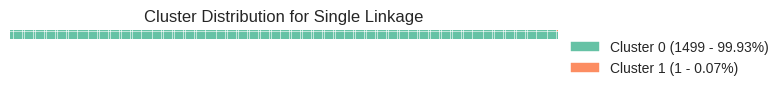

In [ ]:
from pywaffle import Waffle


cluster_counts = df_min['cluster'].value_counts()
total = sum(cluster_counts)

# Plot the waffle chart with percentages added to the labels
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # Number of rows in the waffle chart, you can adjust here
    values=cluster_counts,  # Values for each cluster
    title={'label': 'Cluster Distribution for Single Linkage', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)}, #You can also adjust the number to adjust the legend location
    figsize=(8, 5) #adjust figure size
)

plt.show()


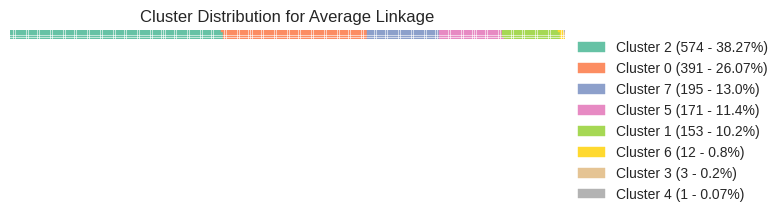

In [ ]:
cluster_counts = df_avg['cluster'].value_counts()
total = sum(cluster_counts)

# Plot the waffle chart with percentages added to the labels
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # Number of rows in the waffle chart, you can adjust here
    values=cluster_counts,  # Values for each cluster
    title={'label': 'Cluster Distribution for Average Linkage', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)}, # You can also change the number to adjust the legend location
    figsize=(8, 5) #adjust figure size
)

plt.show()

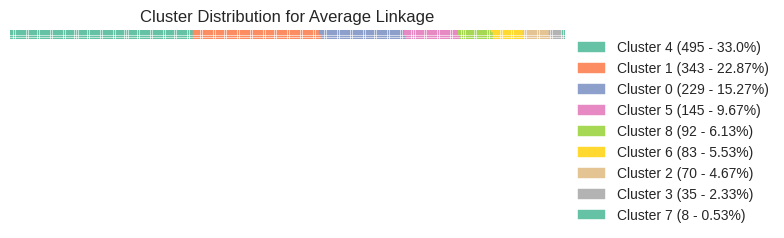

In [ ]:
cluster_counts = df_max['cluster'].value_counts()
total = sum(cluster_counts)

# Plot the waffle chart with percentages added to the labels
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # Number of rows in the waffle chart, you can adjust here
    values=cluster_counts,  # Values for each cluster
    title={'label': 'Cluster Distribution for Average Linkage', 'loc': 'center'},
    labels=[f"Cluster {i} ({count} - {round((count / total) * 100, 2)}%)" for i, count in cluster_counts.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1.2)}, #You can also adjust the number to adjust the legend location
    figsize=(8, 5) #adjust figure size
)

plt.show()

# Q3.4 Identify features or combinations of features that frequently appear together in songs with high or low popularity. Use these insights to suggest improvements to the company’s recommendation playlist.

In [ ]:
from google.colab import drive
!pip install apyori # to install apyori

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_sub

song_name_len  duration_ms  explicit  danceability  energy  loudness  \
0              22.0     211160.0         0         0.751   0.834    -5.444   
1              20.0     167066.0         0         0.434   0.897    -4.918   
2               7.0     250546.0         0         0.529   0.496    -9.007   
3              12.0     224493.0         0         0.551   0.913    -4.063   
4              11.0     200560.0         0         0.614   0.928    -4.806   
...             ...          ...       ...           ...     ...       ...   
1495           31.0     185640.0         0         0.787   0.848    -4.696   
1496           16.0     192670.0         0         0.688   0.841    -5.217   
1497            8.0     217306.0         0         0.627   0.703    -4.884   
1498           11.0     269946.0         1         0.716   0.670    -5.779   
1499           15.0     222213.0         1         0.685   0.709    -3.578   

      mode  speechiness  acousticness  instrumentalness  ...  valence  \
0      0.0       0.0437        0.3000        1.7700e-05  ...    0.894   
1      1.0       0.0488        0.0103        0.0000e+00  ...    0.684   
2      1.0       0.0290        0.1730        0.0000e+00  ...    0.278   
3      0.0       0.0466        0.0263        1.3500e-05  ...    0.544   
4      0.0       0.0516        0.0408        1.0400e-03  ...    0.879   
...    ...          ...           ...               ...  ...      ...   
1495   1.0       0.0549        0.0915        0.0000e+00  ...    0.947   
1496   1.0       0.1790        0.2040        2.9500e-04  ...    0.743   
1497   1.0       0.2360        0.5630        0.0000e+00  ...    0.640   
1498   1.0       0.1940        0.2510        0.0000e+00  ...    0.124   
1499   0.0       0.0748        0.0132        0.0000e+00  ...    0.504   

        tempo  pop  rock  hiphop  dance  folk  rnb  latin  popularity_label  
0      95.053  1.0   0.0     0.0    0.0   0.0  0.0    0.0                 1  
1     148.726  1.0   1.0     0.0    0.0   0.0  0.0    0.0                 1  
2     136.859  1.0   0.0     0.0    0.0   0.0  0.0    0.0                 1  
3     119.992  0.0   1.0     0.0    0.0   0.0  0.0    0.0                 1  
4     172.656  1.0   0.0     0.0    0.0   0.0  0.0    0.0                 1  
...       ...  ...   ...     ...    ...   ...  ...    ...               ...  
1495  121.989  1.0   0.0     0.0    1.0   0.0  0.0    0.0                 0  
1496  133.912  1.0   0.0     0.0    0.0   0.0  0.0    0.0                 0  
1497   81.897  1.0   0.0     1.0    0.0   0.0  0.0    0.0                 0  
1498   86.010  1.0   0.0     1.0    0.0   0.0  0.0    0.0                 0  
1499   93.047  1.0   0.0     0.0    0.0   0.0  0.0    0.0                 0  

[1500 rows x 21 columns]

In [ ]:
# Select only relevant variables for association rule mining
df_cluster_association = df_sub[['danceability', 'energy', 'pop', 'rock', 'hiphop', 'dance', 'folk', 'rnb', 'latin']].copy()

df_cluster_association

danceability  energy  pop  rock  hiphop  dance  folk  rnb  latin
0            0.751   0.834  1.0   0.0     0.0    0.0   0.0  0.0    0.0
1            0.434   0.897  1.0   1.0     0.0    0.0   0.0  0.0    0.0
2            0.529   0.496  1.0   0.0     0.0    0.0   0.0  0.0    0.0
3            0.551   0.913  0.0   1.0     0.0    0.0   0.0  0.0    0.0
4            0.614   0.928  1.0   0.0     0.0    0.0   0.0  0.0    0.0
...            ...     ...  ...   ...     ...    ...   ...  ...    ...
1495         0.787   0.848  1.0   0.0     0.0    1.0   0.0  0.0    0.0
1496         0.688   0.841  1.0   0.0     0.0    0.0   0.0  0.0    0.0
1497         0.627   0.703  1.0   0.0     1.0    0.0   0.0  0.0    0.0
1498         0.716   0.670  1.0   0.0     1.0    0.0   0.0  0.0    0.0
1499         0.685   0.709  1.0   0.0     0.0    0.0   0.0  0.0    0.0

[1500 rows x 9 columns]

In [ ]:
# Binarize continuous variables
df_cluster_association['danceable'] = (df_cluster_association['danceability'] >= 0.6).astype(int)
df_cluster_association['energetic'] = (df_cluster_association['energy'] >= 0.6).astype(int)

# Drop unused raw columns
df_cluster_association.drop(['danceability', 'energy'], axis=1, inplace=True)

In [ ]:
df_cluster_association

pop  rock  hiphop  dance  folk  rnb  latin  danceable  energetic
0     1.0   0.0     0.0    0.0   0.0  0.0    0.0          1          1
1     1.0   1.0     0.0    0.0   0.0  0.0    0.0          0          1
2     1.0   0.0     0.0    0.0   0.0  0.0    0.0          0          0
3     0.0   1.0     0.0    0.0   0.0  0.0    0.0          0          1
4     1.0   0.0     0.0    0.0   0.0  0.0    0.0          1          1
...   ...   ...     ...    ...   ...  ...    ...        ...        ...
1495  1.0   0.0     0.0    1.0   0.0  0.0    0.0          1          1
1496  1.0   0.0     0.0    0.0   0.0  0.0    0.0          1          1
1497  1.0   0.0     1.0    0.0   0.0  0.0    0.0          1          1
1498  1.0   0.0     1.0    0.0   0.0  0.0    0.0          1          1
1499  1.0   0.0     0.0    0.0   0.0  0.0    0.0          1          1

[1500 rows x 9 columns]

In [ ]:
# Replace 1 with column name, 0 with '0'
df_cluster_association = df_cluster_association.apply(lambda col: col.map(lambda x: col.name if x == 1 else '0'))

# Generate list of transactions (omit '0')
transactions = []
for i in range(len(df_cluster_association)):
    transaction = [item for item in df_cluster_association.iloc[i].values if item != '0']
    transactions.append(transaction)

In [ ]:
df_cluster_association

pop  rock  hiphop  dance folk rnb latin  popularity_label  danceable  \
0     pop     0       0      0    0   0     0  popularity_label  danceable   
1     pop  rock       0      0    0   0     0  popularity_label          0   
2     pop     0       0      0    0   0     0  popularity_label          0   
3       0  rock       0      0    0   0     0  popularity_label          0   
4     pop     0       0      0    0   0     0  popularity_label  danceable   
...   ...   ...     ...    ...  ...  ..   ...               ...        ...   
1495  pop     0       0  dance    0   0     0                 0  danceable   
1496  pop     0       0      0    0   0     0                 0  danceable   
1497  pop     0  hiphop      0    0   0     0                 0  danceable   
1498  pop     0  hiphop      0    0   0     0                 0  danceable   
1499  pop     0       0      0    0   0     0                 0  danceable   

      energetic  
0     energetic  
1     energetic  
2             0  
3     energetic  
4     energetic  
...         ...  
1495  energetic  
1496  energetic  
1497  energetic  
1498  energetic  
1499  energetic  

[1500 rows x 10 columns]

In [ ]:
transactions[0]

['pop', 'danceable', 'energetic']

In [ ]:
# Support Count
support_count = {}
for transaction in transactions:
    for item in transaction:
        if item in support_count:
            support_count[item] += 1
        else:
            support_count[item] = 1

# Convert to DataFrame
df_support = pd.DataFrame(list(support_count.items()), columns=['Item', 'Support Count'])
df_support['Support'] = df_support['Support Count'] / len(transactions)
df_support.sort_values(by='Support Count', ascending=False, inplace=True)


In [ ]:
import plotly.graph_objects as go

df_top_20 = df_support.head(20)

fig = go.Figure(data=[go.Bar(
    x=df_top_20["Item"],
    y=df_top_20["Support Count"],
    text=df_top_20["Support Count"],
    textposition="outside",
    hovertext=df_top_20["Item"]
)])

fig.update_traces(marker_color='MediumPurple')
fig.update_layout(
    title_text="Top 20 Features by Frequency",
    template="simple_white",
    width=800,
    height=600,
    xaxis=dict(tickangle=-45)
)
fig.show()

In [ ]:
# First item in each transaction
first_choices = [transaction[0] for transaction in transactions if transaction]

first_choice_count = {}
for item in first_choices:
    if item in first_choice_count:
        first_choice_count[item] += 1
    else:
        first_choice_count[item] = 1

df_first_choice = pd.DataFrame(list(first_choice_count.items()), columns=['Item', 'First Choice Count'])
df_first_choice.sort_values('First Choice Count', ascending=False, inplace=True)
df_top_20_first_choice = df_first_choice.head(20)

# Plot
fig = go.Figure(data=[go.Bar(
    x=df_top_20_first_choice["Item"],
    y=df_top_20_first_choice["First Choice Count"],
    text=df_top_20_first_choice["First Choice Count"],
    textposition="outside",
    hovertext=df_top_20_first_choice["Item"]
)])

fig.update_traces(marker_color='LightSkyBlue')
fig.update_layout(
    title_text="Top 20 First Choice Features",
    template="simple_white",
    width=800,
    height=600,
    xaxis=dict(tickangle=-45)
)
fig.show()


####Association Rule Mining

In [ ]:
# Parameters:
# transactions: Our main dataset. A list of transactions where each transaction is a list of items
# min_support: Minimum support threshold (0.01 means itemsets must appear in at least 1% of transactions)
# min_confidence: Minimum confidence threshold (0.1 means rules must have at least 10% confidence)
# min_lift: Minimum lift threshold (2 means the consequent is at least twice as likely to appear when the antecedent is present)
# min_length: Minimum length of the itemset (2 means itemsets with at least 2 items will be considered)
# max_length: Maximum length of the itemset (2 means itemsets with at most 2 items will be considered)

from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.01, min_confidence = 0.2, min_lift = 1.2, min_length = 2)
results = list(rules)

#from apyori import apriori
#rules = apriori(transactions = transactions, min_support = 0.01, min_confidence = 0.1, min_lift = 2, min_length = 2, max_length = 3)

In [ ]:
# Loop through the generated rules and print relevant details
for rule in results:
    # Display the items involved in the rule (antecedent → consequent)
    print(f"Rule: {rule.items}")

    # Display the support of the rule
    print(f"Support: {rule.support}")

    # Display the confidence of the rule (how likely the consequent is, given the antecedent)
    print(f"Confidence: {rule.ordered_statistics[0].confidence}")

    # Display the lift of the rule (how much more likely the consequent is, given the antecedent)
    print(f"Lift: {rule.ordered_statistics[0].lift}")

    # Print a separator for readability between rules
    print("=" * 30)

Rule: frozenset({'danceable', 'hiphop'})
Support: 0.3233333333333333
Confidence: 0.4681467181467181
Lift: 1.2149136284084379
Rule: frozenset({'danceable', 'latin'})
Support: 0.022
Confidence: 0.8684210526315789
Lift: 1.2573663889453361
Rule: frozenset({'hiphop', 'rnb'})
Support: 0.148
Confidence: 0.3840830449826989
Lift: 1.451195384065613
Rule: frozenset({'danceable', 'latin', 'energetic'})
Support: 0.019333333333333334
Confidence: 0.7631578947368421
Lift: 1.348335503068626
Rule: frozenset({'danceable', 'hiphop', 'pop'})
Support: 0.27666666666666667
Confidence: 0.4005791505791506
Lift: 1.2237652258018858
Rule: frozenset({'danceable', 'hiphop', 'rnb'})
Support: 0.12266666666666666
Confidence: 0.3183391003460207
Lift: 1.5503527614254253
Rule: frozenset({'danceable', 'latin', 'pop'})
Support: 0.019333333333333334
Confidence: 0.7631578947368421
Lift: 1.3008373205741628
Rule: frozenset({'danceable', 'rnb', 'pop'})
Support: 0.19866666666666666
Confidence: 0.7506297229219143
Lift: 1.279482482

####Check our results

In [ ]:
# Prepare lists to store the extracted data
antecedents = []
consequents = []
supports = []
confidences = []
lifts = []

# Loop through the results and extract the necessary details
for rule in results:
    for ordered_stat in rule.ordered_statistics:
        antecedents.append(', '.join(list(ordered_stat.items_base)))  # Antecedent (if available)
        consequents.append(', '.join(list(ordered_stat.items_add)))  # Consequent
        supports.append(rule.support)  # Support
        confidences.append(ordered_stat.confidence)  # Confidence
        lifts.append(ordered_stat.lift)  # Lift

# Create a DataFrame for better visualization
df_rules = pd.DataFrame({
    'Antecedent': antecedents,
    'Consequent': consequents,
    'Support': supports,
    'Confidence': confidences,
    'Lift': lifts
})

# Display the DataFrame
display(df_rules)

Antecedent         Consequent  Support  Confidence  \
0                           danceable             hiphop   0.3233      0.4681   
1                              hiphop          danceable   0.3233      0.8391   
2                               latin          danceable   0.0220      0.8684   
3                              hiphop                rnb   0.1480      0.3841   
4                                 rnb             hiphop   0.1480      0.5592   
..                                ...                ...      ...         ...   
87             hiphop, rnb, energetic     danceable, pop   0.0847      0.8141   
88                rnb, pop, energetic  danceable, hiphop   0.0847      0.4757   
89  danceable, hiphop, pop, energetic                rnb   0.0847      0.3920   
90  danceable, hiphop, rnb, energetic                pop   0.0847      1.0000   
91     danceable, rnb, pop, energetic             hiphop   0.0847      0.6077   

      Lift  
0   1.2149  
1   1.2149  
2   1.2574  
3   1.4512  
4   1.4512  
..     ...  
87  1.3877  
88  1.4711  
89  1.4810  
90  1.2146  
91  1.5770  

[92 rows x 5 columns]

In [ ]:
df_rules_sorted_lift = df_rules.sort_values('Lift', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
display(df_rules_sorted_lift.head(10))


Antecedent                 Consequent  Support  Confidence  \
0                hiphop, pop             danceable, rnb   0.1213      0.3707   
1             danceable, rnb                hiphop, pop   0.1213      0.5909   
2  danceable, rnb, energetic                hiphop, pop   0.0847      0.5880   
3                hiphop, pop  danceable, rnb, energetic   0.0847      0.2587   
4             rnb, energetic                hiphop, pop   0.1033      0.5636   
5                hiphop, pop             rnb, energetic   0.1033      0.3157   
6                hiphop, pop                        rnb   0.1460      0.4460   
7                        rnb                hiphop, pop   0.1460      0.5516   
8     danceable, hiphop, pop             rnb, energetic   0.0847      0.3060   
9             rnb, energetic     danceable, hiphop, pop   0.0847      0.4618   

     Lift  
0  1.8052  
1  1.8052  
2  1.7962  
3  1.7962  
4  1.7219  
5  1.7219  
6  1.6852  
7  1.6852  
8  1.6692  
9  1.6692

In [ ]:
df_rules_sorted_support = df_rules.sort_values('Support', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
display(df_rules_sorted_support.head(10))

Antecedent              Consequent  Support  Confidence    Lift
0               danceable                  hiphop   0.3233      0.4681  1.2149
1                  hiphop               danceable   0.3233      0.8391  1.2149
2             hiphop, pop               danceable   0.2767      0.8452  1.2238
3               danceable             hiphop, pop   0.2767      0.4006  1.2238
4          danceable, pop                  hiphop   0.2767      0.4716  1.2239
5                  hiphop          danceable, pop   0.2767      0.7180  1.2239
6               danceable  hiphop, pop, energetic   0.2160      0.3127  1.2059
7  hiphop, pop, energetic               danceable   0.2160      0.8329  1.2059
8          danceable, pop                     rnb   0.1987      0.3386  1.2795
9                     rnb          danceable, pop   0.1987      0.7506  1.2795

In [ ]:
# Create a bar chart to visualize the lift of the top 20 rules
fig = px.bar(df_rules_sorted_lift.head(20), ###adjust here
             x='Antecedent',
             y='Lift',
             color='Consequent',
             title="Top 20 Association Rules by Lift")

# Display the bar chart
fig.show()

